In [1]:

import matplotlib as mpl
import numpy as np
import scipy 
import pickle
import pylab as plt
import copy
%matplotlib inline

try:
    import cPickle as pickle
except ImportError:
    import pickle
import scipy
from scipy import interpolate
from scipy.interpolate import interp2d, NearestNDInterpolator,LinearNDInterpolator

In [2]:
import pandas as pd

0.03256833813126751

In [371]:
def WeightAtEachPt(Flux,Tau,NumLaunched,Weight):
    InjectArea=np.pi*100**2 #cm
    Tau_sec=Tau*24*60*60 #take from days to seconds
    W= Flux*Tau_sec*InjectArea*(2*NumLaunched/(4*np.pi*.6))**-1*Weight*2
    return W

In [4]:
def Ry (R, phi, theta):
    return (R) * np.cos(phi)

def Rx (R, phi, theta):
    return (R) * np.sin(phi) * np.cos(theta)

def Rz (R, phi, theta):
    return (R) * np.sin(phi) * np.sin(theta)

In [284]:

f=open("/Users/rogerslc/Documents/MuFluxPred/MCEqFluxMeshes.pkl","rb")
EBins, cosas, bs, FluxMeshes= pickle.load(f)
f.close()

f= open('/Users/rogerslc/Documents/MuFluxPred/MCeQ_Muons_interpolator_ALL_Zatsep.pkl', 'rb')
FluxMeshesZat= pickle.load(f)
f.close()   

f= open('/Users/rogerslc/Documents/MuFluxPred/MCeQ_Muons_interpolator_ALL_EPOS-LHC.pkl', 'rb')
FluxMeshesEPOS= pickle.load(f)
f.close()   

f=open("/Users/rogerslc/Documents/MuFluxPred/LinInterps.pkl","rb")
LinInterps=pickle.load(f)
f.close()



In [6]:
MuonsFromData=pd.read_hdf('/Users/rogerslc/TossThisFolder/CombinedDataMusRunV.h5')
MuonsFromData['beta_rot']=(np.rad2deg(MuonsFromData['beta'])+150)%360
MounsNoSparks=MuonsFromData[(MuonsFromData.zvariance>4)&(np.abs(MuonsFromData.beta_rot-330)>4)]

In [34]:
#MCmus=pd.read_hdf("/Users/rogerslc/Documents/MuFluxPred/MCmuonsSelectedSmallerSphere.h5",key="muons")
MCmus=pd.read_hdf("/Users/rogerslc/TossThisFolder/MCmuonsSelectedSmallerSphere.h5",key="muons")
MCmus.loc[(MCmus.muenergy>2)&(MCmus.perconline>.79)&(MCmus.linelength>73.5)&(MCmus.dEdx<.015),'passed']=True
MCmus['beta_rot']=(np.rad2deg(MCmus['beta'])+150)%360
NumLaunched=len(MCmus.run.unique())*300




In [318]:
LinInterps[EBins[ei]](cosas[ica]+eps,bs[ib])

array(0.92086968)

In [309]:
bs[ib]

3.141592653589793

In [328]:
surv

array(0.92086968)

In [332]:
FluxMeshesZat([ei])

TypeError: __call__() missing 1 required positional argument: 'y'

In [372]:
#this is wrong wtf was i doing
eps=0.01
survivalfractions=[]
correctedmeshes=[]

survivalfractionsZat=[]
correctedmeshesZat=[]

survivalfractionsEPOS=[]
correctedmeshesEPOS=[]

for ei in range(0,len(EBins)-2):
    mesh=copy.copy(FluxMeshes[ei])
    meshZat=copy.copy(FluxMeshes[ei])
    meshEPOS=copy.copy(FluxMeshes[ei])  
    
    survmesh=np.zeros_like(mesh)
    survmeshEPOS=np.zeros_like(mesh)    
    survmeshZat=np.zeros_like(meshZat)
    
    for ica in range(len(cosas)):
        for ib in range(len(bs)):
            surv=LinInterps[EBins[ei]](cosas[ica]+eps,bs[ib])      
            
            
            survmesh[ica,ib]=surv
            survmeshZat[ica,ib]=surv
            survmeshEPOS[ica,ib]=surv
            mesh[ica,ib]=mesh[ica,ib]*surv
            meshZat[ica,ib]=meshZat[ica,ib]*surv
            meshEPOS[ica,ib]=meshEPOS[ica,ib]*surv
    correctedmeshes.append(mesh)
    survivalfractions.append(survmesh)
    correctedmeshesZat.append(meshZat)
    survivalfractionsZat.append(survmeshZat)
    correctedmeshesEPOS.append(meshEPOS)
    survivalfractionsEPOS.append(survmeshEPOS)

Text(0, 0.5, '$\\beta$')

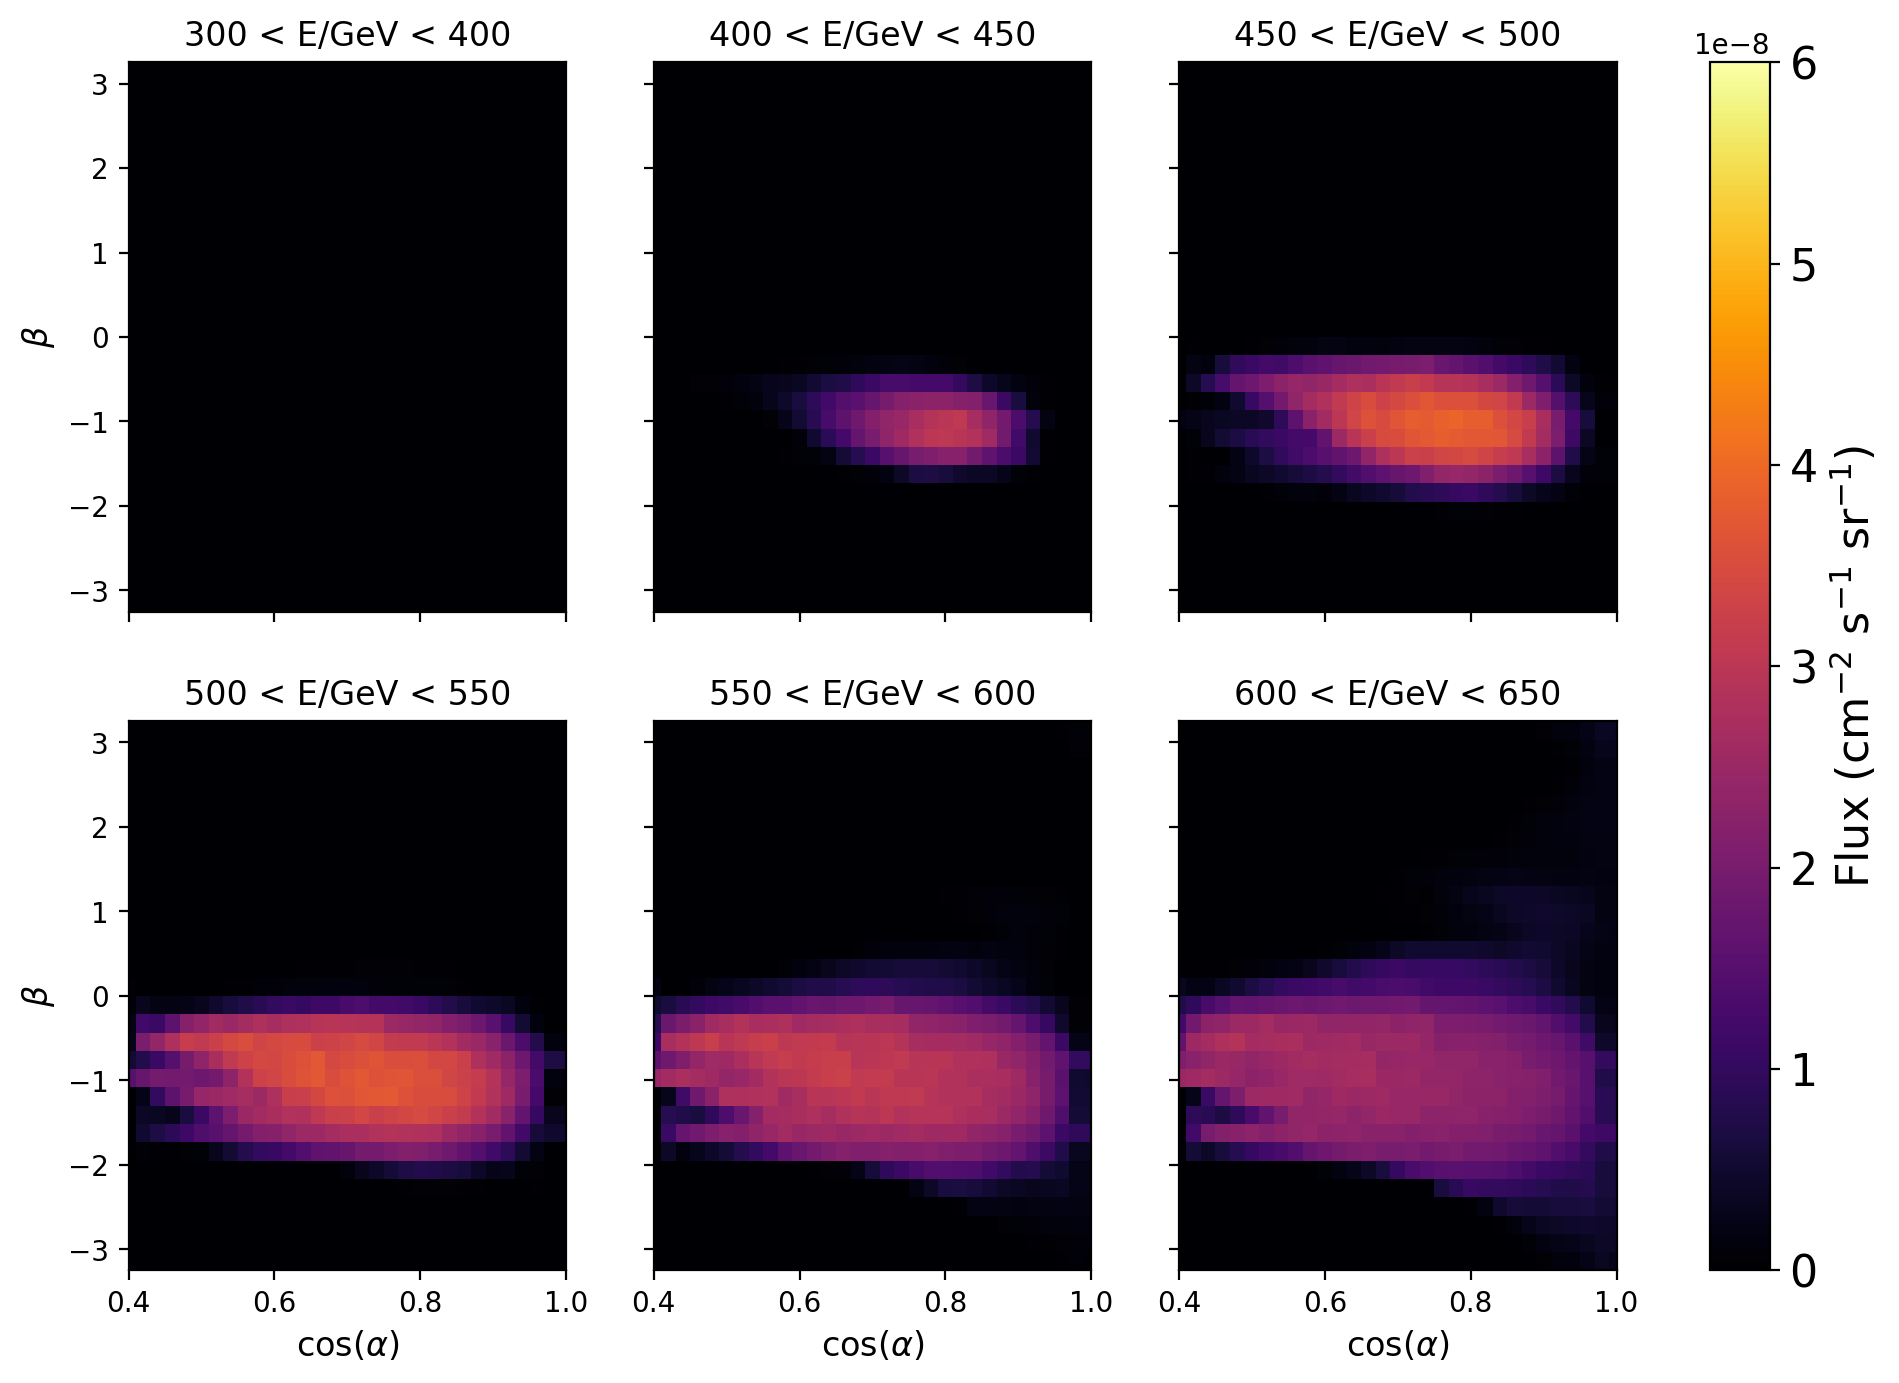

In [373]:
startn=1
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12,8),dpi=200, sharex=True, sharey=True)
for iax in range(0,len(axes.flat)):
    ax=axes.flatten()[iax]
    im=ax.pcolormesh(cosas,bs,np.transpose(correctedmeshes[iax+startn]),cmap='inferno',shading='auto',vmin=0,vmax=6e-8)
    ax.set_title(str(EBins[iax+startn])+ " < E/GeV < " + str(EBins[iax+startn+1]))
    ax.set_xlim(0.4,1)
cbar=fig.colorbar(im, ax=axes.ravel().tolist(),label='Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)')
cbar.set_label('Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)',fontsize=16)
cbar.ax.tick_params(labelsize=16)

axes[1,0].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,1].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,2].set_xlabel(r"cos($\alpha$)",fontsize=12)

axes[1,0].set_ylabel(r"$\beta$",fontsize=12)
axes[0,0].set_ylabel(r"$\beta$",fontsize=12)

Text(0, 0.5, '$\\beta$')

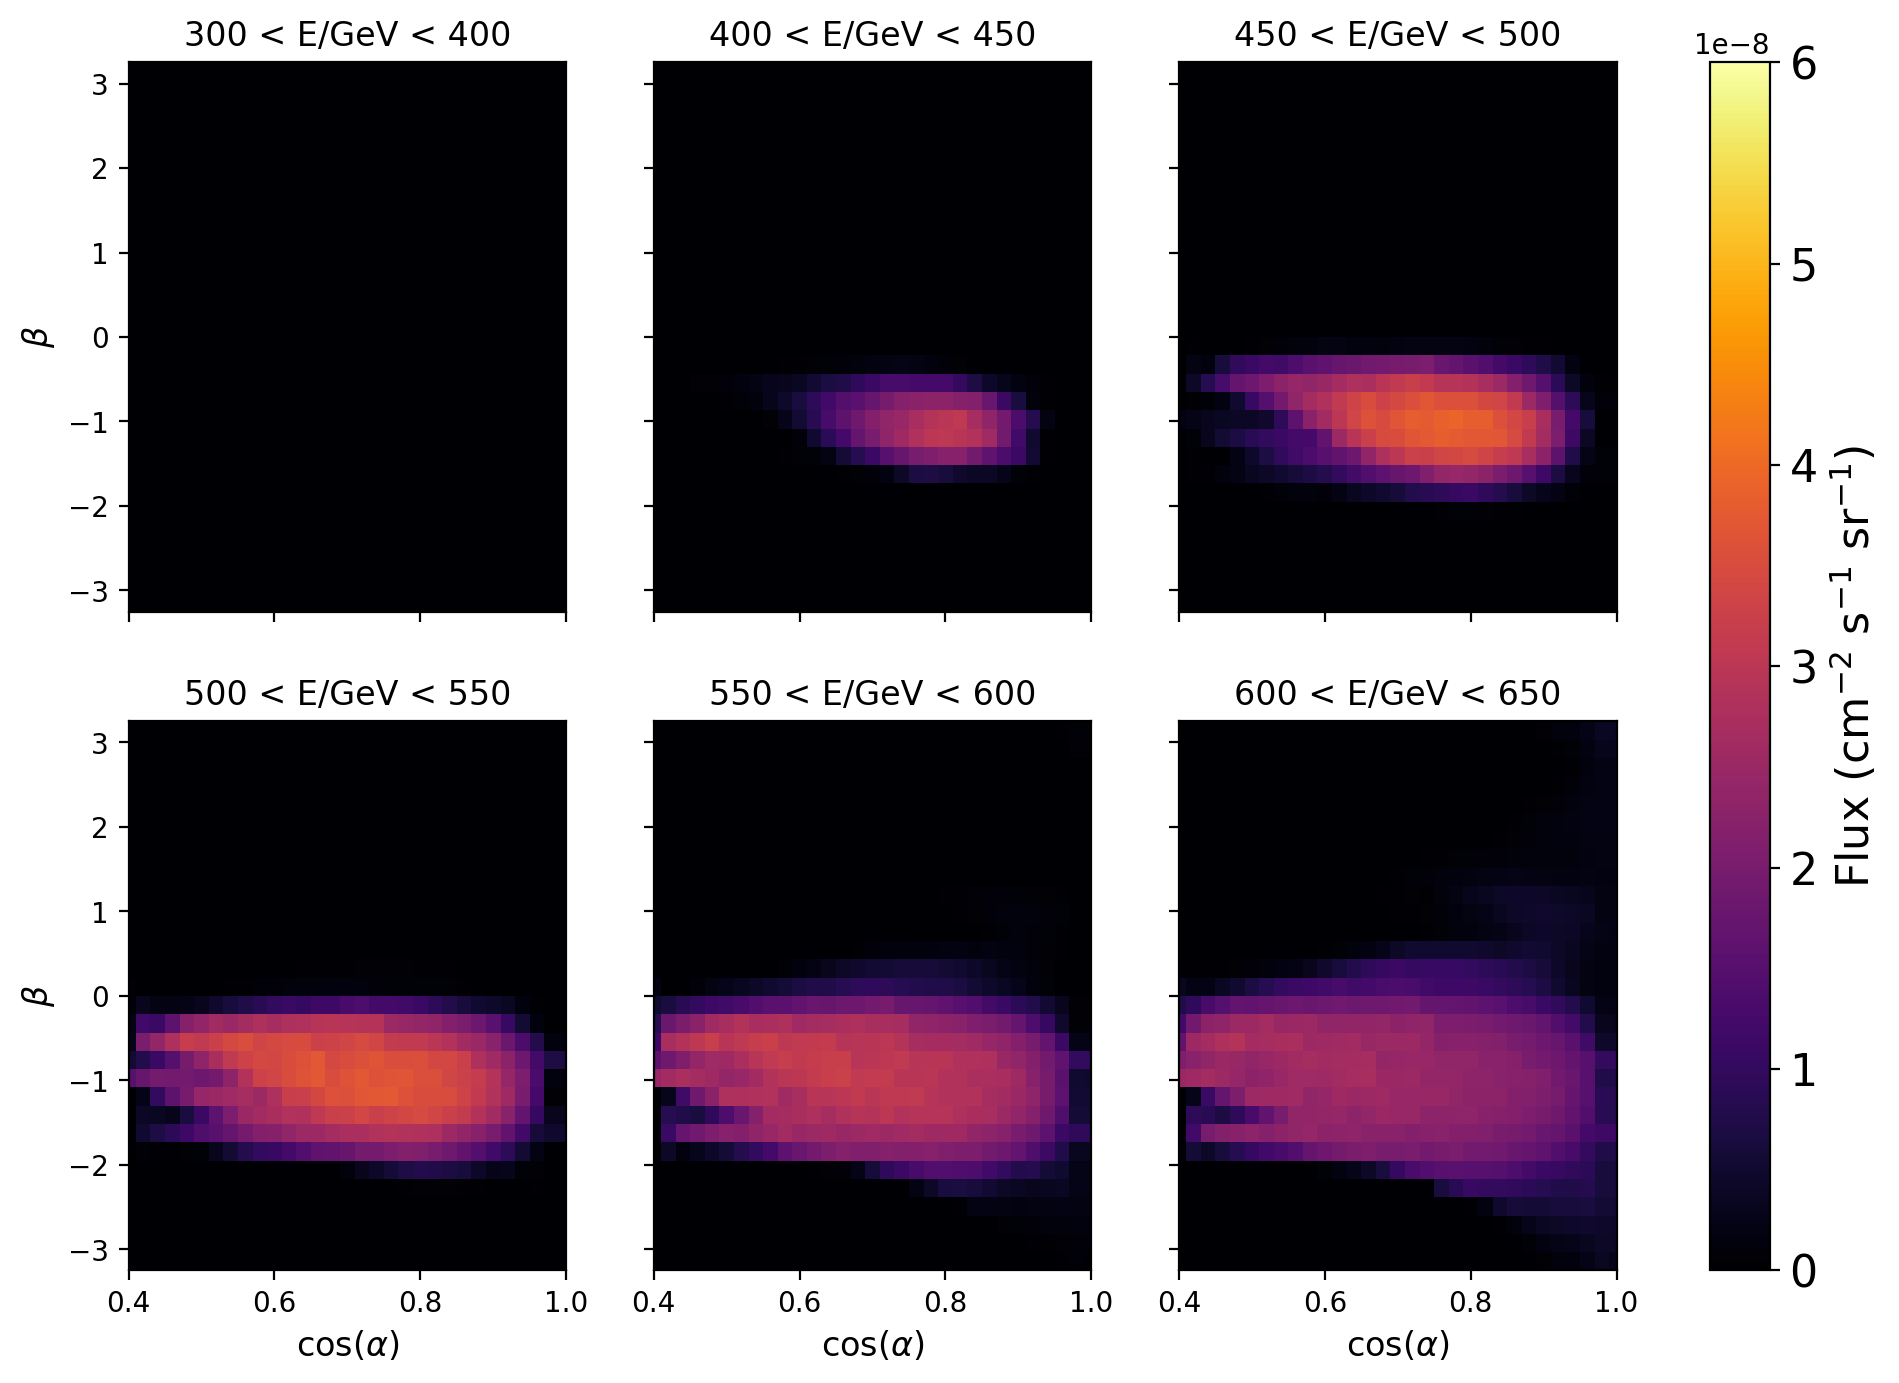

In [374]:
startn=1
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12,8),dpi=200, sharex=True, sharey=True)
for iax in range(0,len(axes.flat)):
    ax=axes.flatten()[iax]
    im=ax.pcolormesh(cosas,bs,np.transpose(correctedmeshesZat[iax+startn]),cmap='inferno',shading='auto',vmin=0,vmax=6e-8)
    ax.set_title(str(EBins[iax+startn])+ " < E/GeV < " + str(EBins[iax+startn+1]))
    ax.set_xlim(0.4,1)
cbar=fig.colorbar(im, ax=axes.ravel().tolist(),label='Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)')
cbar.set_label('Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)',fontsize=16)
cbar.ax.tick_params(labelsize=16)

axes[1,0].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,1].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,2].set_xlabel(r"cos($\alpha$)",fontsize=12)

axes[1,0].set_ylabel(r"$\beta$",fontsize=12)
axes[0,0].set_ylabel(r"$\beta$",fontsize=12)

Text(0, 0.5, '$\\beta$')

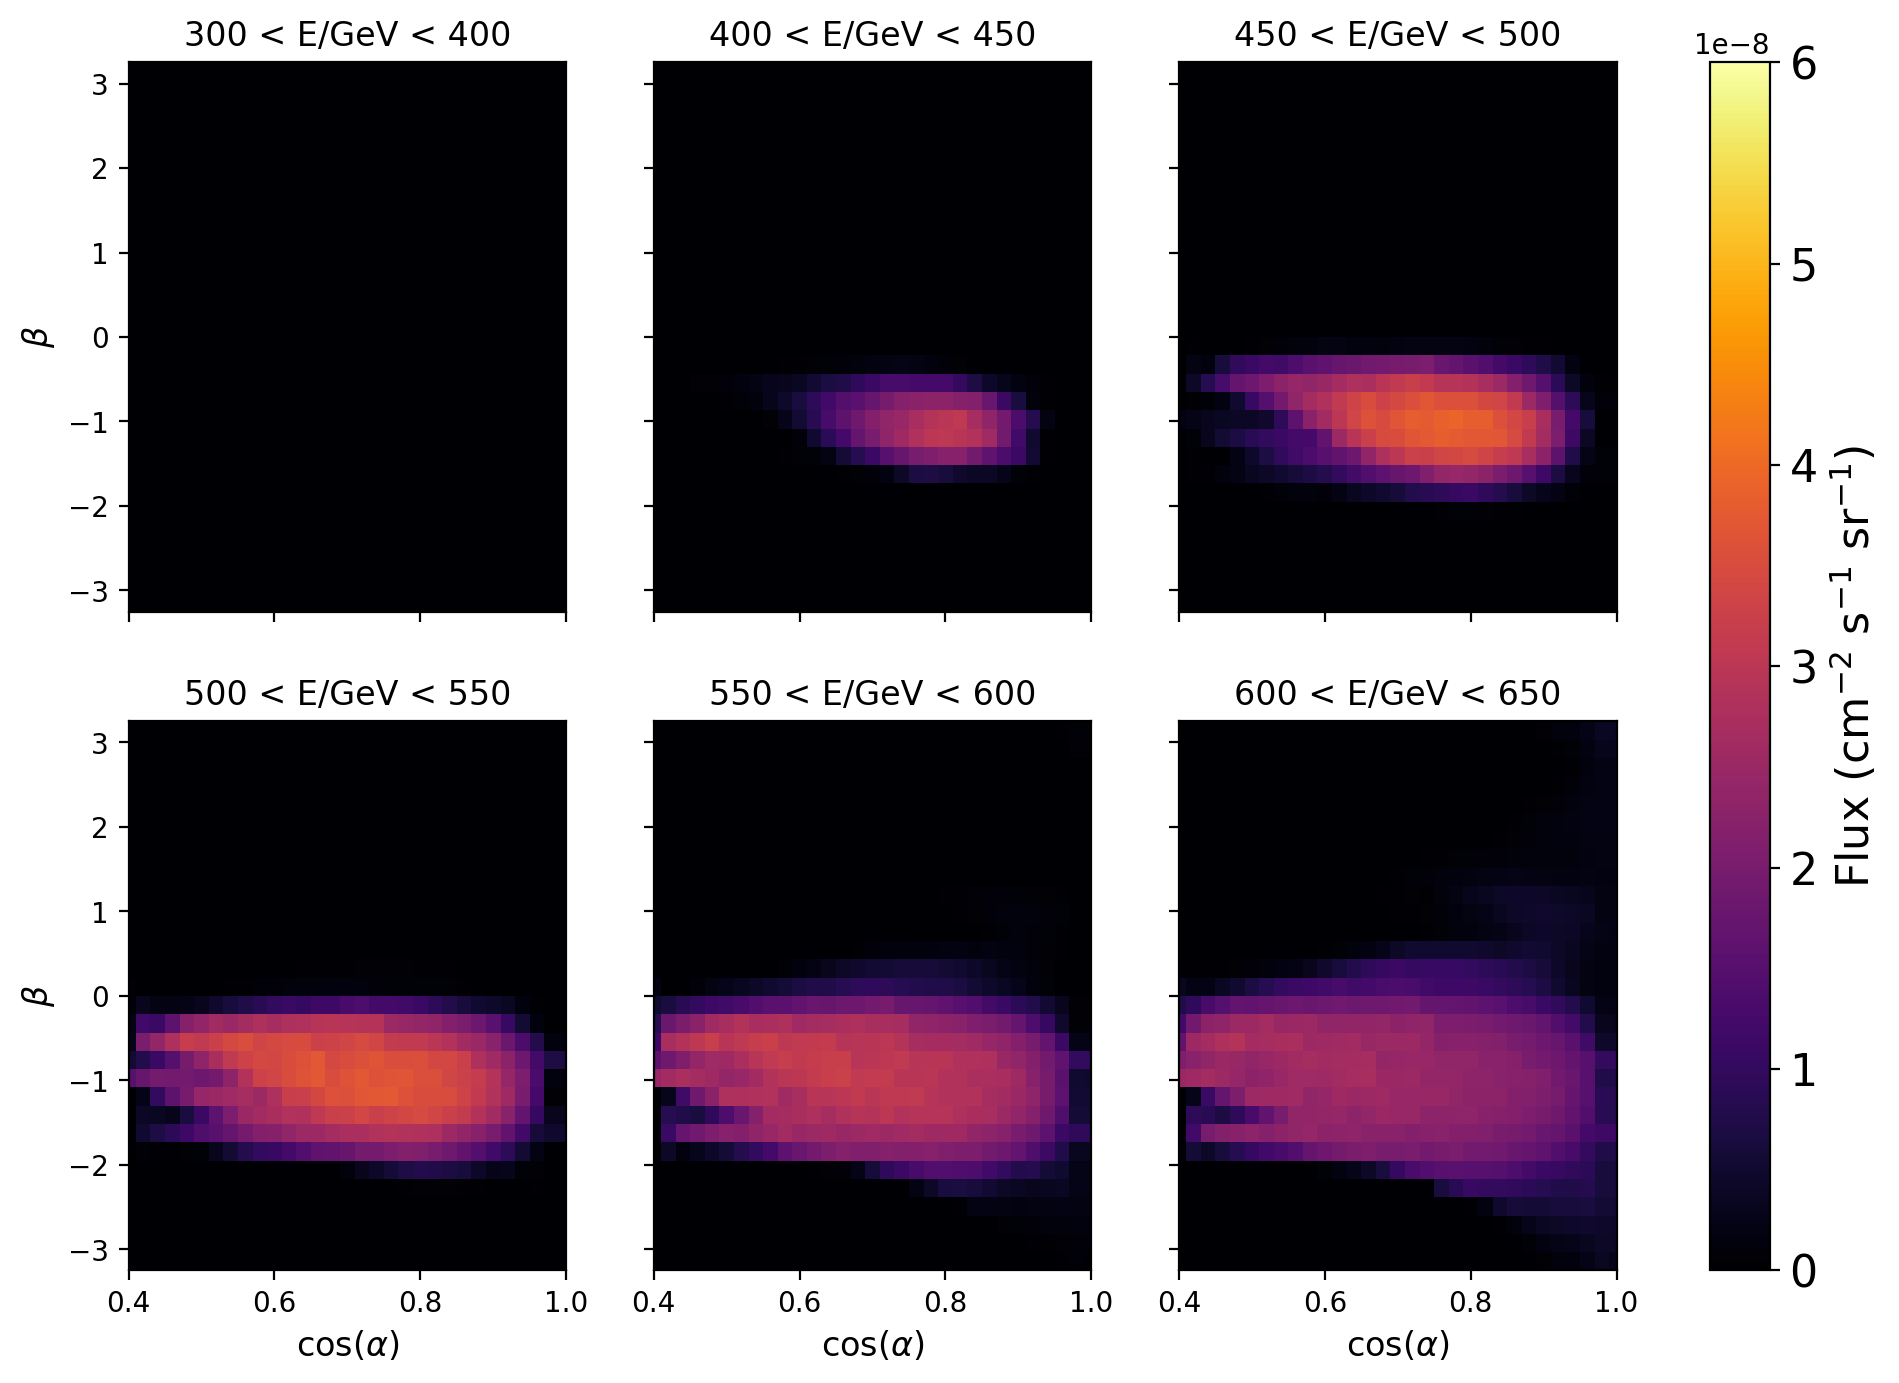

In [375]:
startn=1
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12,8),dpi=200, sharex=True, sharey=True)
for iax in range(0,len(axes.flat)):
    ax=axes.flatten()[iax]
    im=ax.pcolormesh(cosas,bs,np.transpose(correctedmeshesEPOS[iax+startn]),cmap='inferno',shading='auto',vmin=0,vmax=6e-8)
    ax.set_title(str(EBins[iax+startn])+ " < E/GeV < " + str(EBins[iax+startn+1]))
    ax.set_xlim(0.4,1)
cbar=fig.colorbar(im, ax=axes.ravel().tolist(),label='Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)')
cbar.set_label('Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)',fontsize=16)
cbar.ax.tick_params(labelsize=16)

axes[1,0].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,1].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,2].set_xlabel(r"cos($\alpha$)",fontsize=12)

axes[1,0].set_ylabel(r"$\beta$",fontsize=12)
axes[0,0].set_ylabel(r"$\beta$",fontsize=12)

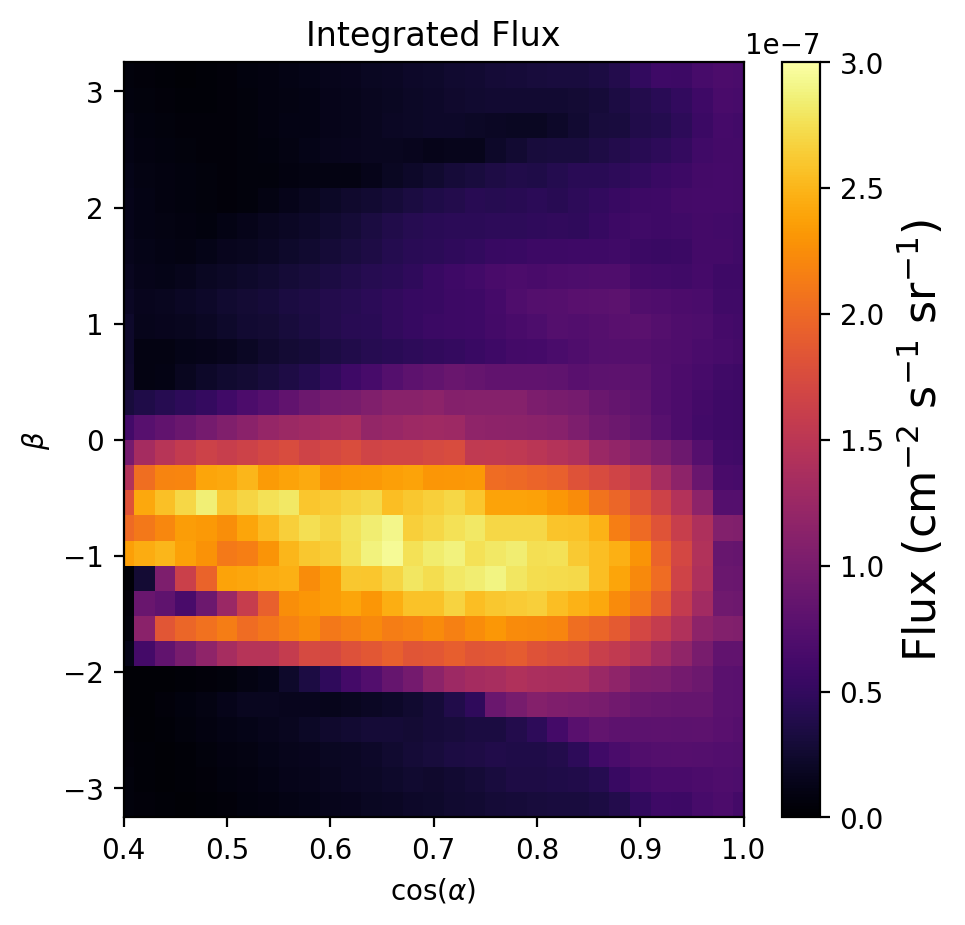

In [376]:
totalflux=np.zeros_like(correctedmeshes[0])
for m in correctedmeshes:
    totalflux+=m


plt.figure(figsize=(5,5),dpi=200)
im=plt.pcolormesh(cosas,bs,np.transpose(totalflux),cmap='inferno',shading='auto',vmin=0,vmax=3e-7)
ax.set_title("Integrated")

plt.xlabel(r"cos($\alpha$)")
plt.ylabel(r"$\beta$")
plt.xlim(0.4,1)
plt.title("Integrated Flux")
cbar=plt.colorbar()
cbar.set_label('Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)',fontsize=16)



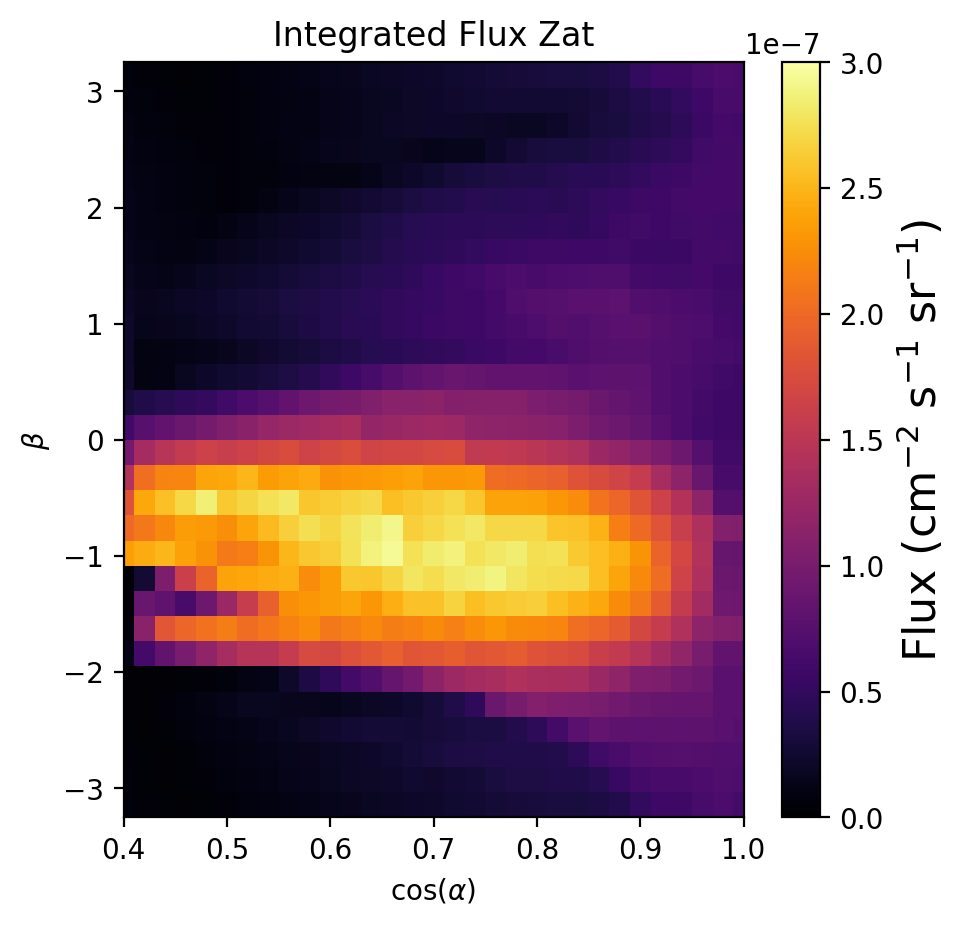

In [377]:
totalfluxZat=np.zeros_like(correctedmeshesZat[0])
for n in  correctedmeshesZat:
    totalfluxZat+=n

plt.figure(figsize=(5,5),dpi=200)
im=plt.pcolormesh(cosas,bs,np.transpose(totalfluxZat),cmap='inferno',shading='auto',vmin=0,vmax=3e-7)
ax.set_title("Integrated")

plt.xlabel(r"cos($\alpha$)")
plt.ylabel(r"$\beta$")
plt.xlim(0.4,1)
plt.title("Integrated Flux Zat")
cbar=plt.colorbar()
cbar.set_label('Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)',fontsize=16)

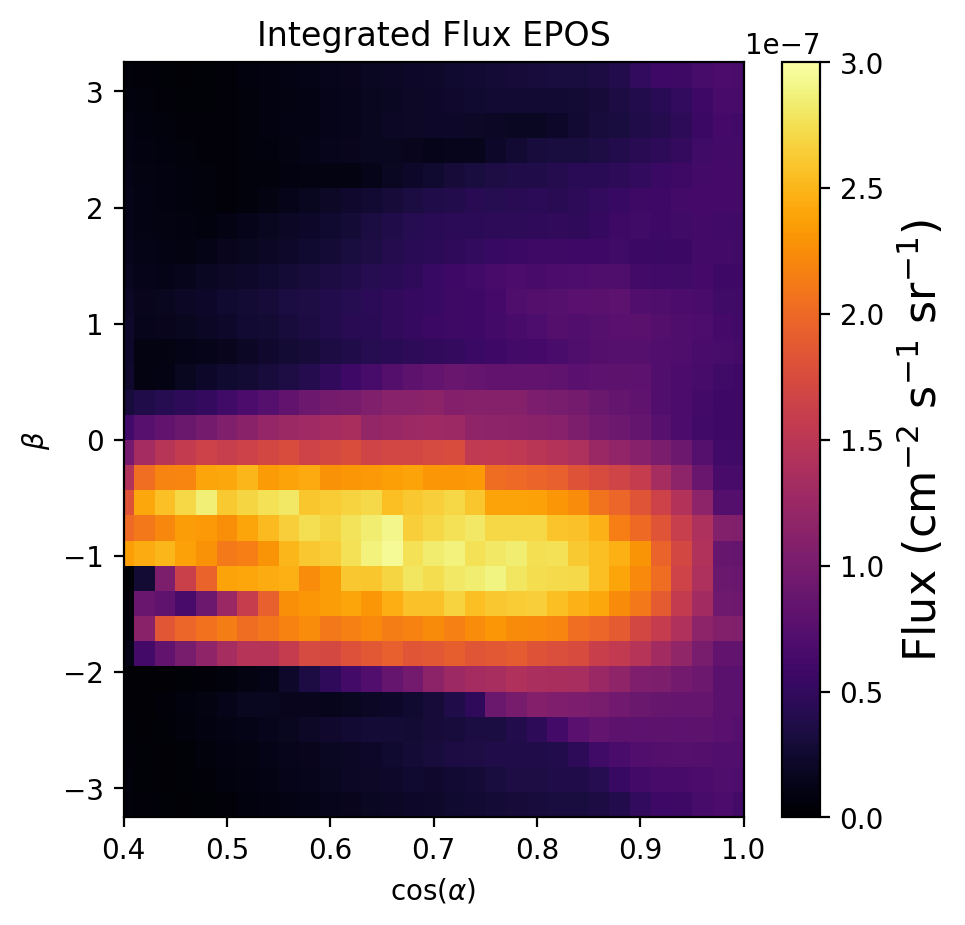

In [378]:
totalfluxEPOS=np.zeros_like(correctedmeshesEPOS[0])
for n in  correctedmeshesEPOS:
    totalfluxEPOS+=n

plt.figure(figsize=(5,5),dpi=200)
im=plt.pcolormesh(cosas,bs,np.transpose(totalfluxEPOS),cmap='inferno',shading='auto',vmin=0,vmax=3e-7)
ax.set_title("Integrated")

plt.xlabel(r"cos($\alpha$)")
plt.ylabel(r"$\beta$")
plt.xlim(0.4,1)
plt.title("Integrated Flux EPOS")
cbar=plt.colorbar()
cbar.set_label('Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)',fontsize=16)

In [379]:
FluxMuons=scipy.interpolate.RectBivariateSpline(np.unique(cosas),np.unique(bs),totalflux,s=0,kx=3, ky=3) 

with open('/Users/rogerslc/Documents/MuFluxPred/TotalFluxInterpolator.pkl', 'wb') as f:
    pickle.dump(FluxMuons, f)
    
FluxMuonsZat=scipy.interpolate.RectBivariateSpline(np.unique(cosas),np.unique(bs),totalfluxZat,s=0,kx=3, ky=3) 

with open('/Users/rogerslc/Documents/MuFluxPred/TotalFluxInterpolatorZat.pkl', 'wb') as f:
    pickle.dump(FluxMuonsZat, f)
    
FluxMuonsEPOS=scipy.interpolate.RectBivariateSpline(np.unique(cosas),np.unique(bs),totalfluxEPOS,s=0,kx=3, ky=3) 

with open('/Users/rogerslc/Documents/MuFluxPred/TotalFluxInterpolatorEPOS.pkl', 'wb') as f:
    pickle.dump(FluxMuonsEPOS, f)    
    
f=open("/Users/rogerslc/Documents/MuFluxPred/MeasuredPolarFluxInterpolator.pkl","rb")
MeasPolarFlux= pickle.load(f) #done as beta from 0,2pi, then alpha, careful
f.close()

In [380]:
PassedMC=MCmus[MCmus.passed==True]
radius=1000

W=[]
for LOC in range(0,len(PassedMC)):
    alpha=PassedMC['MCalpha'].iloc[LOC]
    beta=PassedMC['MCbeta'].iloc[LOC] 
    
    xintercept=PassedMC.xintercept.iloc[LOC] 
    yintercept=PassedMC.yintercept.iloc[LOC] 
    zintercept=PassedMC.zintercept.iloc[LOC] 
    
    MCunix=(Rx(radius,alpha,beta))/radius #should be direction of muon
    MCuniy=(Ry(radius,alpha,beta))/radius
    MCuniz=(Rz(radius,alpha,beta))/radius
    
    
    C2=MCunix**2+MCuniy**2+MCuniz**2
    C1=2*(MCunix*xintercept+MCuniy*yintercept+MCuniz*(zintercept-250))
    C0=xintercept**2+yintercept**2 +(zintercept-250)**2-1000**2
         
    t=np.roots([C2,C1,C0])[0]

    
    ptofinterx=MCunix*t+xintercept
    ptofintery=MCuniy*t+yintercept
    ptofinterz=MCuniz*t+zintercept
    
    sphrad=(ptofinterx**2+ptofintery**2+ptofinterz**2)**.5
    sphunix=(ptofinterx)/sphrad
    sphuniy=(ptofintery)/sphrad
    sphuniz=(ptofinterz)/sphrad
    
    PassedMC['Weight'].iloc[LOC]=np.abs(4*(sphunix*MCunix+sphuniy*MCuniy+sphuniz*MCuniz))


PassedMC["MCbeta_diff"]=np.deg2rad(PassedMC["beta_rot"])-np.pi
PassedMC["WeightedPts"]=0
PassedMC["WeightedPtsEpos"]=0
PassedMC["WeightedPtsZat"]=0
PassedMC["WeightedPts_MeasFlux"]=0
PassedMC["measfluxweight"]=0
PassedMC["simfluxweight_zat"]=0 
PassedMC["simfluxweight_epos"]=0   
PassedMC["simfluxweight"]=0   
        
for loc in range(0,len(PassedMC)):
    MCpt=PassedMC.iloc[loc]
    WT=MCpt.Weight
    F=MeasPolarFlux(MCpt.MCbeta_diff+np.pi,MCpt.MCalpha)
    PassedMC["measfluxweight"].iloc[loc]=F
    PassedMC["WeightedPts_MeasFlux"].iloc[loc]=WeightAtEachPt(F,271.6,NumLaunched,WT)
    #print(WT,F,np.cos(MCpt.MCalpha),MCpt.MCbeta)
    
for loc in range(0,len(PassedMC)):
    MCpt=PassedMC.iloc[loc]
    WT=MCpt.Weight
    F=FluxMuons(np.cos(MCpt.MCalpha),MCpt.MCbeta_diff)
    PassedMC["simfluxweight"].iloc[loc]=F
    PassedMC["WeightedPts"].iloc[loc]=WeightAtEachPt(F,271.6,NumLaunched,WT)


    Fz=FluxMuonsZat(np.cos(MCpt.MCalpha),MCpt.MCbeta_diff)
    PassedMC["simfluxweight_zat"].iloc[loc]=Fz
    PassedMC["WeightedPtsZat"].iloc[loc]=WeightAtEachPt(Fz,271.6,NumLaunched,WT)    


    Fe=FluxMuonsEPOS(np.cos(MCpt.MCalpha),MCpt.MCbeta_diff)
    PassedMC["simfluxweight_epos"].iloc[loc]=Fe
    PassedMC["WeightedPtsEpos"].iloc[loc]=WeightAtEachPt(Fe,271.6,NumLaunched,WT)    
        
MCmusSpkCut=PassedMC[(PassedMC.zvariance>4)&(np.abs(np.rad2deg(PassedMC.beta)-330)>4)]



In [381]:
MCmusSave.columns

Index(['dEdx', 'perconline', 'linelength', 'muenergy', 'eventnum', 'beta',
       'alpha', 'xintercept', 'yintercept', 'zintercept', 'MCbeta', 'MCalpha',
       'MCperconlin', 'MCdEdx', 'MClength', 'FiducialPass', 'zvariance',
       'AngleWeight', 'costheta', 'run', 'passed', 'beta_rot', 'MCbeta_diff',
       'TotalWeight_Sim', 'WeightedPtsEpos', 'WeightedPtsZat',
       'TotalWeight_Meas', 'FluxWeight_Meas', 'simfluxweight_zat',
       'simfluxweight_epos', 'simfluxweight'],
      dtype='object')

In [382]:
MCmusSave=MCmusSpkCut.drop(['Passed'],axis=1)
MCmusSave=MCmusSave.rename(columns={'Weight':'AngleWeight',"WeightedPts":"TotalWeight_Sim"})
MCmusSave=MCmusSave.rename(columns={"WeightedPts_MeasFlux":"TotalWeight_Meas","measfluxweight":"FluxWeight_Meas"})
MCmusSave.to_hdf('/Users/rogerslc/TossThisFolder/MCmusPassedWithSparkCut2.h5','Muons')

In [383]:
MCmusSave.TotalWeight_Meas

8        5.138052
27       2.808736
39       5.635299
55       2.109896
101      6.060585
           ...   
14616    1.192214
14617    5.956917
14618    2.660176
14621    4.517038
14625    4.892533
Name: TotalWeight_Meas, Length: 1104, dtype: float64

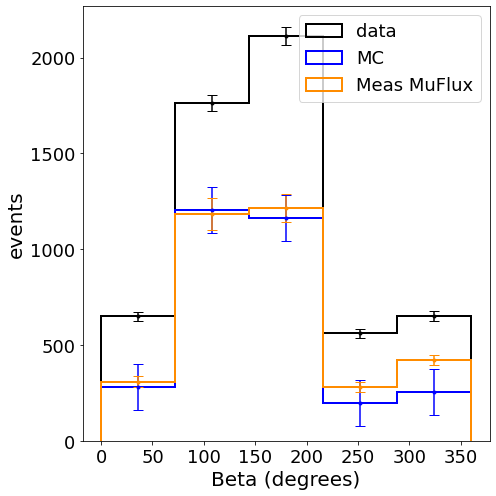

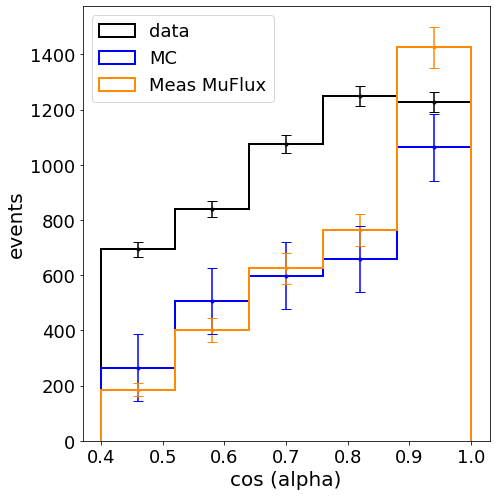

In [384]:
numofsteps=6

plt.figure(figsize=(7,7))
h=plt.hist(MounsNoSparks['beta_rot'],bins=np.linspace(0,360,numofsteps),color='black',histtype='step',label='data',linewidth=2)
plt.errorbar((h[1][1:]+h[1][:-1])/2,h[0],yerr=np.sqrt(h[0]),capsize=5,fmt='.',color='black')



MCwt=(MCmusSpkCut['WeightedPts']+MCmusSpkCut['WeightedPtsZat']+MCmusSpkCut['WeightedPtsEpos'])/3
ST5=np.sum(MCmusSpkCut['WeightedPts']**2)
SB5=np.sum(MCmusSpkCut['WeightedPtsZat']**2)
SE5=np.sum(MCmusSpkCut['WeightedPtsEpos']**2)


err5=((ST5+SB5+SE5)/3)**.5

measwt=MCmusSpkCut['WeightedPts_MeasFlux']



Mh=plt.hist(MCmusSpkCut['beta_rot'],weights=MCwt,bins=np.linspace(0,360,numofsteps),color='Blue',label='MC',histtype='step',linewidth=2)
wee=np.sqrt(np.histogram(MCmusSpkCut['beta_rot'],bins=np.linspace(0,360,numofsteps), weights=MCmusSpkCut['WeightedPts']**2)[0])
plt.errorbar((Mh[1][1:]+Mh[1][:-1])/2,Mh[0],yerr=err5,fmt='.',color='Blue',capsize=5)



Polh=plt.hist(MCmusSpkCut['beta_rot'],weights=measwt,bins=np.linspace(0,360,numofsteps),color='darkorange',label='Meas MuFlux',histtype='step',linewidth=2)
wee=np.sqrt(np.histogram(MCmusSpkCut['beta_rot'],bins=np.linspace(0,360,numofsteps), weights=MCmusSpkCut['WeightedPts_MeasFlux']**2)[0])
plt.errorbar((Polh[1][1:]+Polh[1][:-1])/2,Polh[0],yerr=wee,fmt='.',color='darkorange',capsize=5)

#plt.title("MC")
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
#plt.xlim(0,360)  
plt.ylabel('events',fontsize=20)
plt.xlabel('Beta (degrees)',fontsize=20)
plt.tight_layout()
#plt.legend(fontsize=18,loc="upper center", ncol=3, title="Mass Fraction of $^{3}$He",title_fontsize=18)
plt.legend(fontsize=18,loc="upper right")
plt.savefig('/Users/rogerslc/Documents/betahist.png',dpi=250,bbox_inches='tight')
plt.show()




plt.figure(figsize=(7,7))
h=plt.hist(np.cos(MounsNoSparks['alpha']),bins=np.linspace(.4,1,numofsteps),histtype='step',color='black',label='data',linewidth=2)
plt.errorbar((h[1][1:]+h[1][:-1])/2,h[0],yerr=np.sqrt(h[0]),capsize=5,fmt='.',color='black')


Mh=plt.hist(np.cos(MCmusSpkCut['alpha']),weights=MCwt,bins=np.linspace(.4,1,numofsteps),color='Blue',label='MC',histtype='step',linewidth=2)
wee=np.sqrt(np.histogram(np.cos(MCmusSpkCut['alpha']),bins=np.linspace(.4,1,numofsteps), weights=MCwt**2)[0])
plt.errorbar((Mh[1][1:]+Mh[1][:-1])/2,Mh[0],yerr=err5,fmt='.',color='Blue',capsize=5)



Polh=plt.hist(np.cos(MCmusSpkCut['alpha']),weights=measwt,bins=np.linspace(.4,1,numofsteps),color='darkorange',label='Meas MuFlux',histtype='step',linewidth=2)
wee=np.sqrt(np.histogram(np.cos(MCmusSpkCut['alpha']),bins=np.linspace(.4,1,numofsteps), weights=measwt**2)[0])
plt.errorbar((Polh[1][1:]+Polh[1][:-1])/2,Polh[0],yerr=wee,fmt='.',color='darkorange',capsize=5)



#plt.title("MC")
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
#plt.xlim(0,360)  
plt.ylabel('events',fontsize=20)
plt.xlabel('cos (alpha)',fontsize=20)
plt.tight_layout()
plt.legend(fontsize=18,loc="upper left")
plt.savefig('/Users/rogerslc/Documents/alphahist.png',dpi=250,bbox_inches='tight')
plt.show()




In [229]:
weeZat.sum()

265.42952859420814

In [244]:
err5.sum()

120.03346599749851

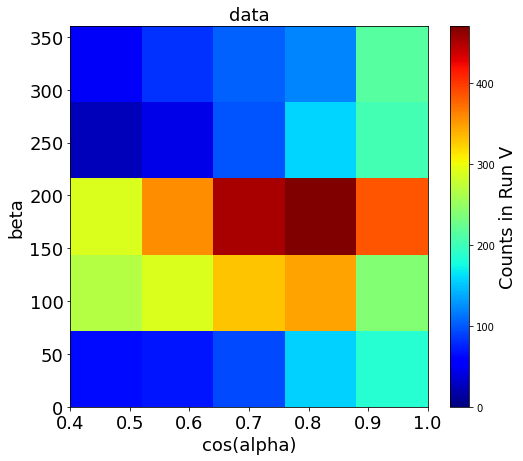

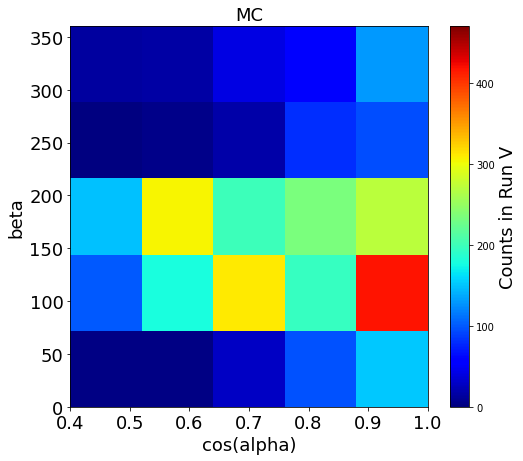

In [359]:
plt.figure(figsize=(8,7))
h2d=plt.hist2d( np.cos(MounsNoSparks['alpha']),MounsNoSparks['beta_rot'],bins=[np.linspace(.4,1,numofsteps),np.linspace(0,360,numofsteps)], cmap=plt.cm.jet,vmin=0,vmax=470)
#h2d=plt.hist2d( np.cos(MounsNoSparks['alpha']),MounsNoSparks['beta_rot'],weights=MounsNoSparks['WeightedPts'],bins=[np.linspace(.4,1,numofsteps),np.linspace(0,360,numofsteps)], cmap=plt.cm.jet,vmin=0,vmax=215)
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
plt.ylabel('beta',fontsize=18)
plt.xlabel('cos(alpha)',fontsize=18)
plt.title('data',fontsize=18)
cbar=plt.colorbar()
cbar.set_label('Counts in Run V',fontsize=18)
plt.savefig('/Users/rogerslc/Documents/DataFlux2d.png',dpi=250,bbox_inches='tight')
plt.show()


plt.figure(figsize=(8,7))
MCh2d=plt.hist2d( np.cos(MCmusSpkCut['alpha']),MCmusSpkCut['beta_rot'],weights=MCwt,bins=[np.linspace(.4,1,numofsteps),np.linspace(0,360,numofsteps)], cmap=plt.cm.jet,vmin=0,vmax=470)
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
plt.ylabel('beta',fontsize=18)
plt.xlabel('cos(alpha)',fontsize=18)
plt.title('MC',fontsize=18)
cbar=plt.colorbar()
cbar.set_label('Counts in Run V',fontsize=18)
plt.savefig('/Users/rogerslc/Documents/MCFlux2d.png',dpi=250,bbox_inches='tight')
plt.show()


/var/folders/jm/hwfgsj_5419b1s2h09k6lflr6k3jsz/T/ipykernel_11856/2931834146.py:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Xlableslist[0:3],rotation='verticle')


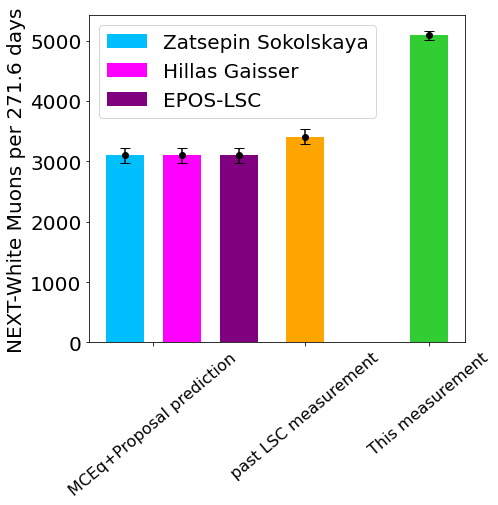

In [361]:
WT1=5.26*(271.6*24*60*60)*(.178*.47) #from paper
err1=.21

WT2=4.77 *(271.6*24*60*60)*(.178*.47) #from Pau
err2=.05



Xlables=["MCEq+Proposal prediction","MCEq+Proposal prediction", "past LSC measurement", "This measurement"]
xplace=[1.6,2.2,2.8,3.5,4.8]

Xlableslist=["MCEq+Proposal prediction", "past LSC measurement", "This measurement"]
xplacelist=[1.9,3.5,4.8]



MCwt=MCmusSpkCut['WeightedPts']
MCzt=MCmusSpkCut['WeightedPtsZat']
MCep=MCmusSpkCut['WeightedPtsEpos']
CnMeas=MCmusSpkCut['WeightedPts_MeasFlux']


WT3=np.sum(MCzt)
err3=np.sum(MCzt**2)**.5

WT4=np.sum(MCwt)
err4=np.sum(MCwt**2)**.5

WT5=np.sum(CnMeas)
err5=np.sum(CnMeas**2)**.5


WT6=np.sum(h2d[0])
err6=np.sum(h2d[0])**.5

WT7=np.sum(MCep)
err7=np.sum(MCep**2)**.5


fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)
#ax1.bar(xplace[0],height=WT1, width=.4,color="deepskyblue")
#ax1.bar(xplace[1],height=WT2, width=.4,color="deepskyblue")
ax1.bar(xplace[0],height=WT3, width=.4,color="deepskyblue",label='Zatsepin Sokolskaya')
plt.errorbar(xplace[0],WT3,color='k',yerr=err3, fmt="o",capsize=5)

ax1.bar(xplace[1],height=WT4, width=.4,color="magenta",label='Hillas Gaisser')
plt.errorbar(xplace[1],WT4,color='k',yerr=err4, fmt="o",capsize=5)

ax1.bar(xplace[2],height=WT7, width=.4,color="purple",label='EPOS-LSC')
plt.errorbar(xplace[2],WT7,color='k',yerr=err4, fmt="o",capsize=5)

ax1.bar(xplace[3],height=WT5, width=.4,color="orange")
plt.errorbar(xplace[3],WT5,color='k',yerr=err5, fmt="o",capsize=5)

ax1.bar(xplace[4],height=WT6, width=.4,color="limegreen")
plt.errorbar(xplace[4],WT6,color='k',yerr=err6, fmt="o",capsize=5)

ax1.set_ylabel('NEXT-White Muons per 271.6 days',fontsize=20)
ax1.text(xplacelist[0:3],Xlableslist[0:3],rotation='verticle')

#plt.errorbar(xplace[0],WT1,color='k',yerr=err1, fmt="o",capsize=5,label='Canfranc Mu Meas')
#plt.errorbar(xplace[1],WT2,color='k',yerr=err2, fmt="o",capsize=5,label='Current Muon Flux Meas from Next')
#plt.errorbar(xplace[2],WT3,color='k',yerr=err3, fmt="o",capsize=5,label='this work')


plt.yticks(fontsize=20)
plt.xticks(xplacelist,Xlableslist,fontsize=16,rotation=40)
plt.tight_layout()
plt.legend(fontsize=20)

plt.yticks(fontsize=20) 
#plt.semilogy()
#plt.tight_layout()

plt.savefig("/Users/rogerslc/Documents/diffflux.png",dpi=250,bbox_inches='tight')

In [279]:
CLRS=["gray","firebrick","orchid","deepskyblue","orange","blueviolet","magenta","limegreen","pink","tomato","red","black","yellow","darkgreen"]

NameError: name 'CLR' is not defined

In [185]:
MCwt

8        5.781554
27       1.828083
39       8.074413
55       1.459047
101      6.568434
           ...   
14616    0.578380
14617    3.604567
14618    2.037927
14621    1.786046
14625    5.151329
Name: WeightedPts, Length: 1104, dtype: float64

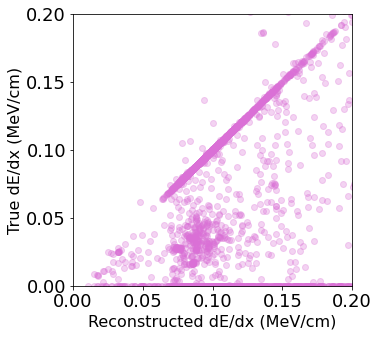

In [14]:
fig = plt.figure(figsize=(5,5))
plt.scatter(MCmus.dEdx*10,MCmus["MCdEdx"]*10,alpha=.3,color='orchid')
plt.xlabel("Reconstructed dE/dx (MeV/cm)",fontsize=16)
plt.ylabel("True dE/dx (MeV/cm)",fontsize=16)
plt.xlim(0,.2)
plt.ylim(0,.2)
plt.locator_params(nbins=4)
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
plt.savefig('TrueVSrecodEdx.png',dpi=250,bbox_inches='tight')

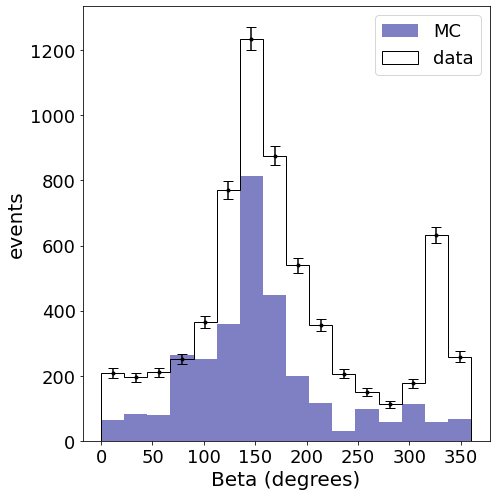

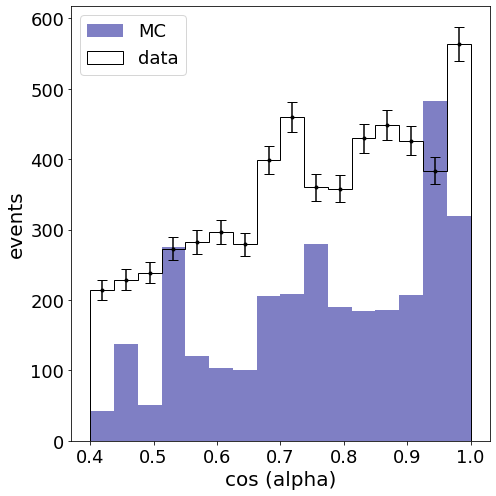

In [91]:
numofsteps=17

plt.figure(figsize=(7,7))
Mh=plt.hist(MCmusSpkCut['beta_rot'],weights=MCmusSpkCut['WeightedPts'],bins=np.linspace(0,360,numofsteps),color='DarkBlue',alpha=0.5,label='MC')
h=plt.hist(MuonsFromData['beta_rot'],bins=np.linspace(0,360,numofsteps),color='black',histtype='step',label='data')
plt.errorbar((h[1][1:]+h[1][:-1])/2,h[0],yerr=np.sqrt(h[0]),capsize=5,fmt='.',color='black')
#plt.title("MC")
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
#plt.xlim(0,360)  
plt.ylabel('events',fontsize=20)
plt.xlabel('Beta (degrees)',fontsize=20)
plt.tight_layout()
#plt.legend(fontsize=18,loc="upper center", ncol=3, title="Mass Fraction of $^{3}$He",title_fontsize=18)
plt.legend(fontsize=18,loc="upper right")
plt.savefig('betahist.png',dpi=250,bbox_inches='tight')
plt.show()


plt.figure(figsize=(7,7))
Mh=plt.hist(np.cos(MCmusSpkCut['alpha']),weights=MCmusSpkCut['WeightedPts'],bins=np.linspace(.4,1,numofsteps),color='DarkBlue',alpha=0.5,label='MC')
h=plt.hist(np.cos(MuonsFromData['alpha']),bins=np.linspace(.4,1,numofsteps),histtype='step',color='black',label='data')
plt.errorbar((h[1][1:]+h[1][:-1])/2,h[0],yerr=np.sqrt(h[0]),capsize=5,fmt='.',color='black')
#plt.title("MC")
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
#plt.xlim(0,360)  
plt.ylabel('events',fontsize=20)
plt.xlabel('cos (alpha)',fontsize=20)
plt.tight_layout()
plt.legend(fontsize=18,loc="upper left")
plt.savefig('alphahist.png',dpi=250,bbox_inches='tight')
plt.show()


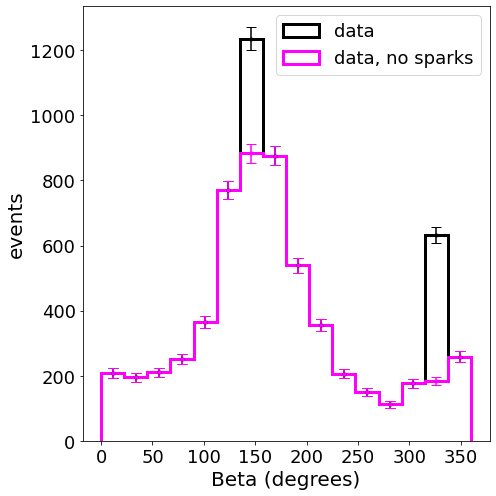

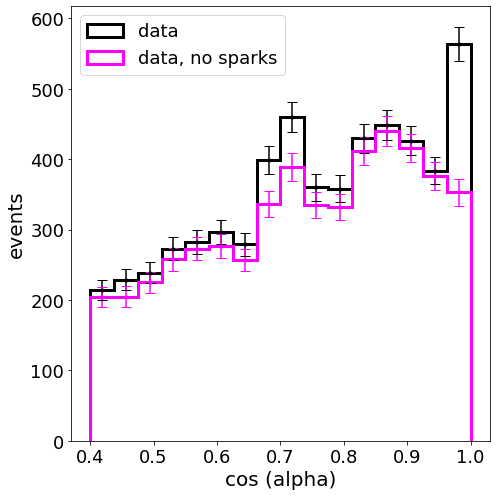

In [125]:
numofsteps=17
plt.figure(figsize=(7,7))
h=plt.hist(MuonsFromData['beta_rot'],bins=np.linspace(0,360,numofsteps),color='black',histtype='step',label='data',linewidth=3)
plt.errorbar((h[1][1:]+h[1][:-1])/2,h[0],yerr=np.sqrt(h[0]),capsize=5,fmt='.',color='black')
h4=plt.hist(MuonsFromData[(MuonsFromData.zvariance>4)&(np.abs(MuonsFromData.beta_rot-330)>4)]['beta_rot'],bins=np.linspace(0,360,numofsteps),color='magenta',histtype='step',label='data, no sparks',linewidth=3)
plt.errorbar((h4[1][1:]+h4[1][:-1])/2,h4[0],yerr=np.sqrt(h4[0]),capsize=5,fmt='.',color='magenta')
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
 
plt.ylabel('events',fontsize=20)
plt.xlabel('Beta (degrees)',fontsize=20)
plt.tight_layout()
plt.legend(fontsize=18,loc="upper right")
plt.savefig('/Users/rogerslc/Documents/betasparks.png',dpi=250,bbox_inches='tight')
plt.show()

plt.figure(figsize=(7,7))
h=plt.hist(np.cos(MuonsFromData['alpha']),bins=np.linspace(.4,1,numofsteps),histtype='step',color='black',label='data',linewidth=3)
plt.errorbar((h[1][1:]+h[1][:-1])/2,h[0],yerr=np.sqrt(h[0]),capsize=5,fmt='.',color='black')
h4=plt.hist(np.cos(MuonsFromData[(MuonsFromData.zvariance>4)&(np.abs(MuonsFromData.beta_rot-330)>4)]['alpha']),bins=np.linspace(.4,1,numofsteps),color='magenta',histtype='step',label='data, no sparks',linewidth=3)
plt.errorbar((h4[1][1:]+h4[1][:-1])/2,h4[0],yerr=np.sqrt(h4[0]),capsize=5,fmt='.',color='magenta')
#plt.title("MC")
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
#plt.xlim(0,360)  
plt.ylabel('events',fontsize=20)
plt.xlabel('cos (alpha)',fontsize=20)
plt.tight_layout()
plt.legend(fontsize=18,loc="upper left")
plt.savefig('/Users/rogerslc/Documents/alphasparks.png',dpi=250,bbox_inches='tight')
plt.show()

In [130]:
MuonsFromData[(MuonsFromData.zvariance<4)&(np.abs(MuonsFromData.beta_rot-330)<4)&(MuonsFromData.runnum==7759)]

,dEdx,perconline,linelength,muenergy,eventnum,beta,alpha,zvariance,xintercept,yintercept,zintercept,runnum,Passed,beta_rot
3379,0.011575,0.970689,208.898794,2.491088,1232,3.144670,1.396264,1.762053,-659.921027,0.000000,149.404891,7759,True,330.176344
3392,0.008004,0.942265,254.968477,2.165716,424957,3.193953,0.017477,0.158831,0.000000,-5992.633008,410.830039,7759,True,333.000000
3403,0.005930,0.934756,353.564915,2.243030,763743,3.193953,0.803537,0.122926,0.000000,-14.608712,459.934038,7759,True,333.000000


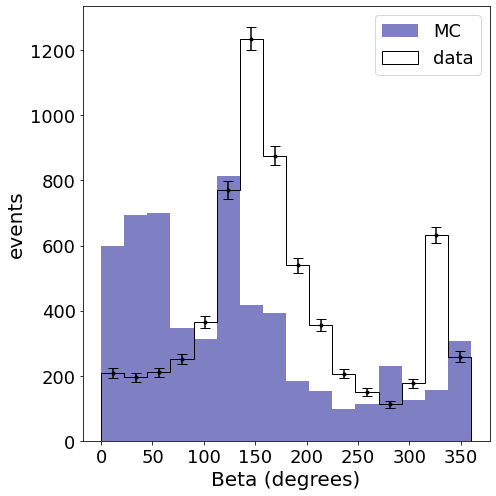

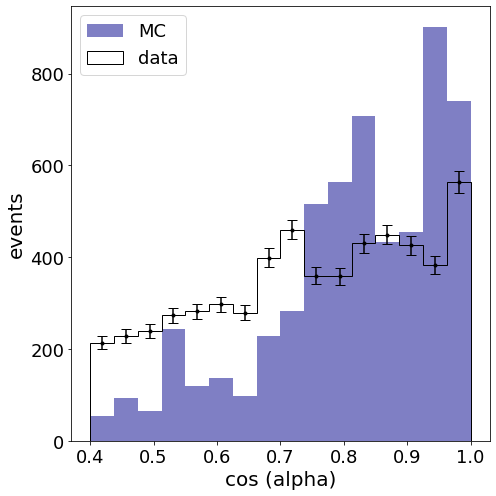

In [54]:
numofsteps=17

factorbeta=np.sum(h[0])/MCmusSpkCut['WeightedPts'].sum()

plt.figure(figsize=(7,7))
#factorbeta=2.01
plt.hist(np.rad2deg(MCmusSpkCut['beta']),weights=MCmusSpkCut['WeightedPts']*factorbeta,bins=np.linspace(0,360,numofsteps),color='DarkBlue',alpha=0.5,label='MC')
h=plt.hist(MuonsFromData['beta_rot'],bins=np.linspace(0,360,numofsteps),color='black',histtype='step',label='data')
plt.errorbar((h[1][1:]+h[1][:-1])/2,h[0],yerr=np.sqrt(h[0]),capsize=5,fmt='.',color='black')
#plt.title("MC")
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
#plt.xlim(0,360)  
plt.ylabel('events',fontsize=20)
plt.xlabel('Beta (degrees)',fontsize=20)
plt.tight_layout()
#plt.legend(fontsize=18,loc="upper center", ncol=3, title="Mass Fraction of $^{3}$He",title_fontsize=18)
plt.legend(fontsize=18,loc="upper right")
plt.savefig('betahist_factor.png',dpi=250,bbox_inches='tight')
plt.show()

#factoralpha=2.01
plt.figure(figsize=(7,7))
Mh=plt.hist(np.cos(MCmusSpkCut['alpha']),weights=MCmusSpkCut['WeightedPts']*factorbeta,bins=np.linspace(.4,1,numofsteps),color='DarkBlue',alpha=0.5,label='MC')
h=plt.hist(np.cos(MuonsFromData['alpha']),bins=np.linspace(.4,1,numofsteps),histtype='step',color='black',label='data')
plt.errorbar((h[1][1:]+h[1][:-1])/2,h[0],yerr=np.sqrt(h[0]),capsize=5,fmt='.',color='black')
#plt.title("MC")
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
#plt.xlim(0,360)  
plt.ylabel('events',fontsize=20)
plt.xlabel('cos (alpha)',fontsize=20)
plt.tight_layout()
plt.legend(fontsize=18,loc="upper left")
plt.savefig('alphahist_factor.png',dpi=250,bbox_inches='tight')
plt.show()

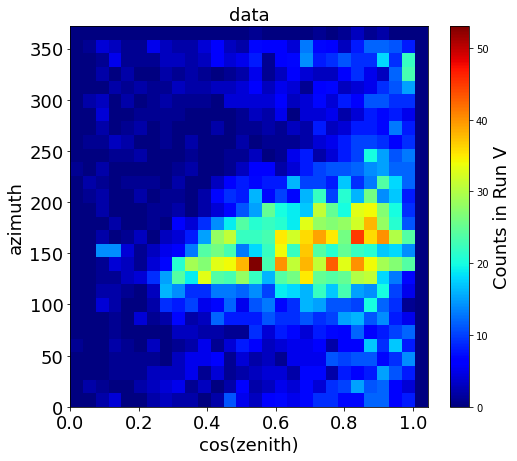

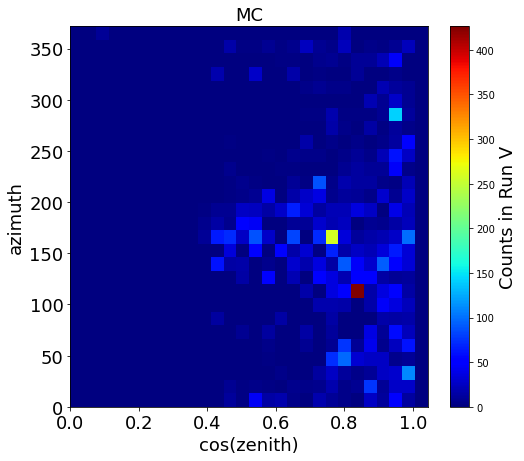

In [33]:

stpsize=30

binsa=np.linspace(0,385,stpsize)
bin_centersa = binsa[:-1] + np.diff(binsa) / 2
bin_edgesa=binsa[:-1] 
binsz=np.linspace(0,1.08,stpsize)
bin_centersz = binsz[:-1] + np.diff(binsz) / 2
bin_edgesz=binsz[:-1] 

plt.figure(figsize=(8,7))
plt.hist2d( np.cos(MounsNoSparks['alpha']),MounsNoSparks['beta_rot'],bins=[bin_edgesz,bin_edgesa], cmap=plt.cm.jet)
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
plt.ylabel('azimuth',fontsize=18)
plt.xlabel('cos(zenith)',fontsize=18)
plt.title('data',fontsize=18)
cbar=plt.colorbar()
cbar.set_label('Counts in Run V',fontsize=18)
plt.savefig('DataFlux2d.png',dpi=250,bbox_inches='tight')
plt.show()

plt.figure(figsize=(8,7))
plt.hist2d( np.cos(MCmusSpkCut['alpha']),np.rad2deg(MCmusSpkCut['beta']),weights=MCmusSpkCut['WeightedPts']*factorbeta,bins=[bin_edgesz,bin_edgesa], cmap=plt.cm.jet)
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
plt.ylabel('azimuth',fontsize=18)
plt.xlabel('cos(zenith)',fontsize=18)
plt.title('MC',fontsize=18)
cbar=plt.colorbar()
cbar.set_label('Counts in Run V',fontsize=18)
plt.savefig('MCFlux2d.png',dpi=250,bbox_inches='tight')
plt.show()

In [56]:
l=49 #cm
d=35.6 #cm
fiducial_area=l*d

In [57]:
def onlook_area(cosalpha):
    l=49 #cm
    d=35.6 #cm
    zeta=np.pi/2-np.arccos(cosalpha)
    A=d*l*np.sin(zeta)+np.pi*(d/2)**2*np.cos(zeta)
    return A

/var/folders/jm/hwfgsj_5419b1s2h09k6lflr6k3jsz/T/ipykernel_11856/1323579045.py:4: RuntimeWarning: invalid value encountered in arccos
  zeta=np.pi/2-np.arccos(cosalpha)


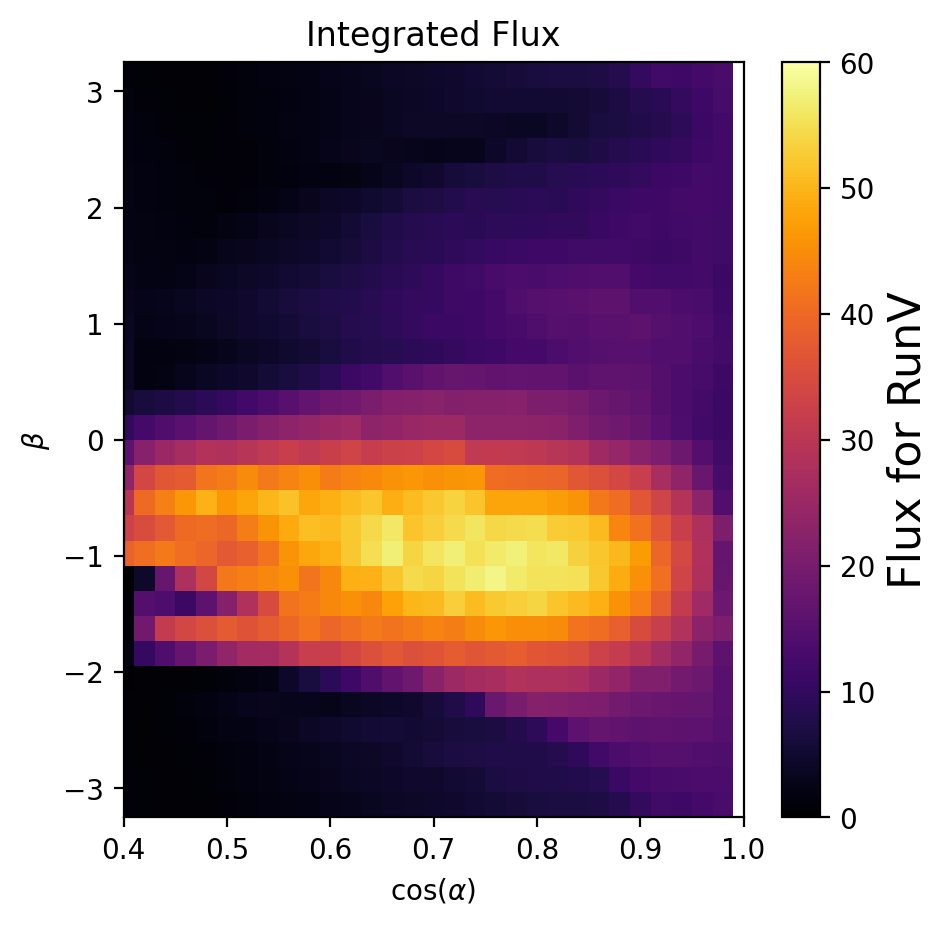

In [58]:
plt.figure(figsize=(5,5),dpi=200)
totalflux=np.zeros_like(correctedmeshes[0])
for m in correctedmeshes:
    totalflux+=m
ster=np.diff(bs)[0]*np.diff(cosas)[0]
tau=271.6*24*60*60
im=plt.pcolormesh(cosas,bs,np.transpose(totalflux*ster)*onlook_area(cosas)*tau,cmap='inferno',shading='auto',vmin=0,vmax=60)
ax.set_title("Integrated, MCeQ+Proposal")

plt.xlabel(r"cos($\alpha$)")
plt.ylabel(r"$\beta$")
plt.xlim(0.4,1)
plt.title("Integrated Flux")
cbar=plt.colorbar()
cbar.set_label('Flux for RunV',fontsize=16)
plt.savefig("/Users/rogerslc/Documents/MuFluxPred/IntegratedFlux.png",dpi=250,bbox_inches='tight')

In [59]:

cos_centersa=cosas[:-1] + np.diff(cosas) / 2



(0.0, 5e-06)

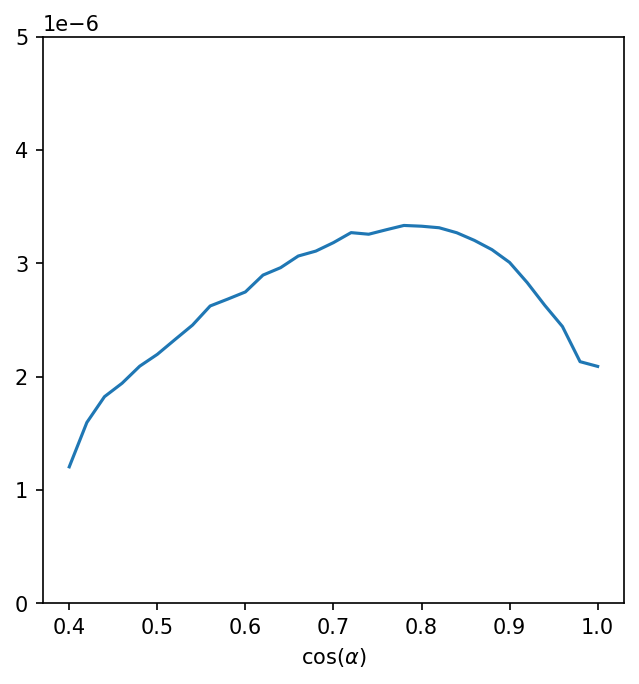

In [60]:
plt.figure(figsize=(5,5),dpi=150)
plt.plot(cosas,[sum(t) for t in totalflux])
plt.xlabel(r"cos($\alpha$)")
plt.ylim(0,5e-6)


Text(0.5, 0, '$\\beta$')

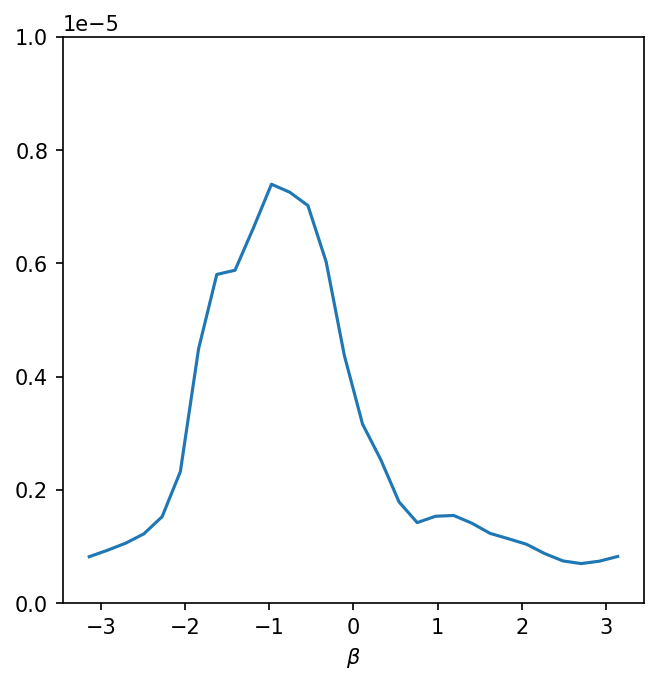

In [61]:

plt.figure(figsize=(5,5),dpi=150)

plt.ylim(0,1e-5)
plt.plot(bs,sum(totalflux))
plt.xlabel(r"$\beta$")

Text(0, 0.5, '$\\beta$')

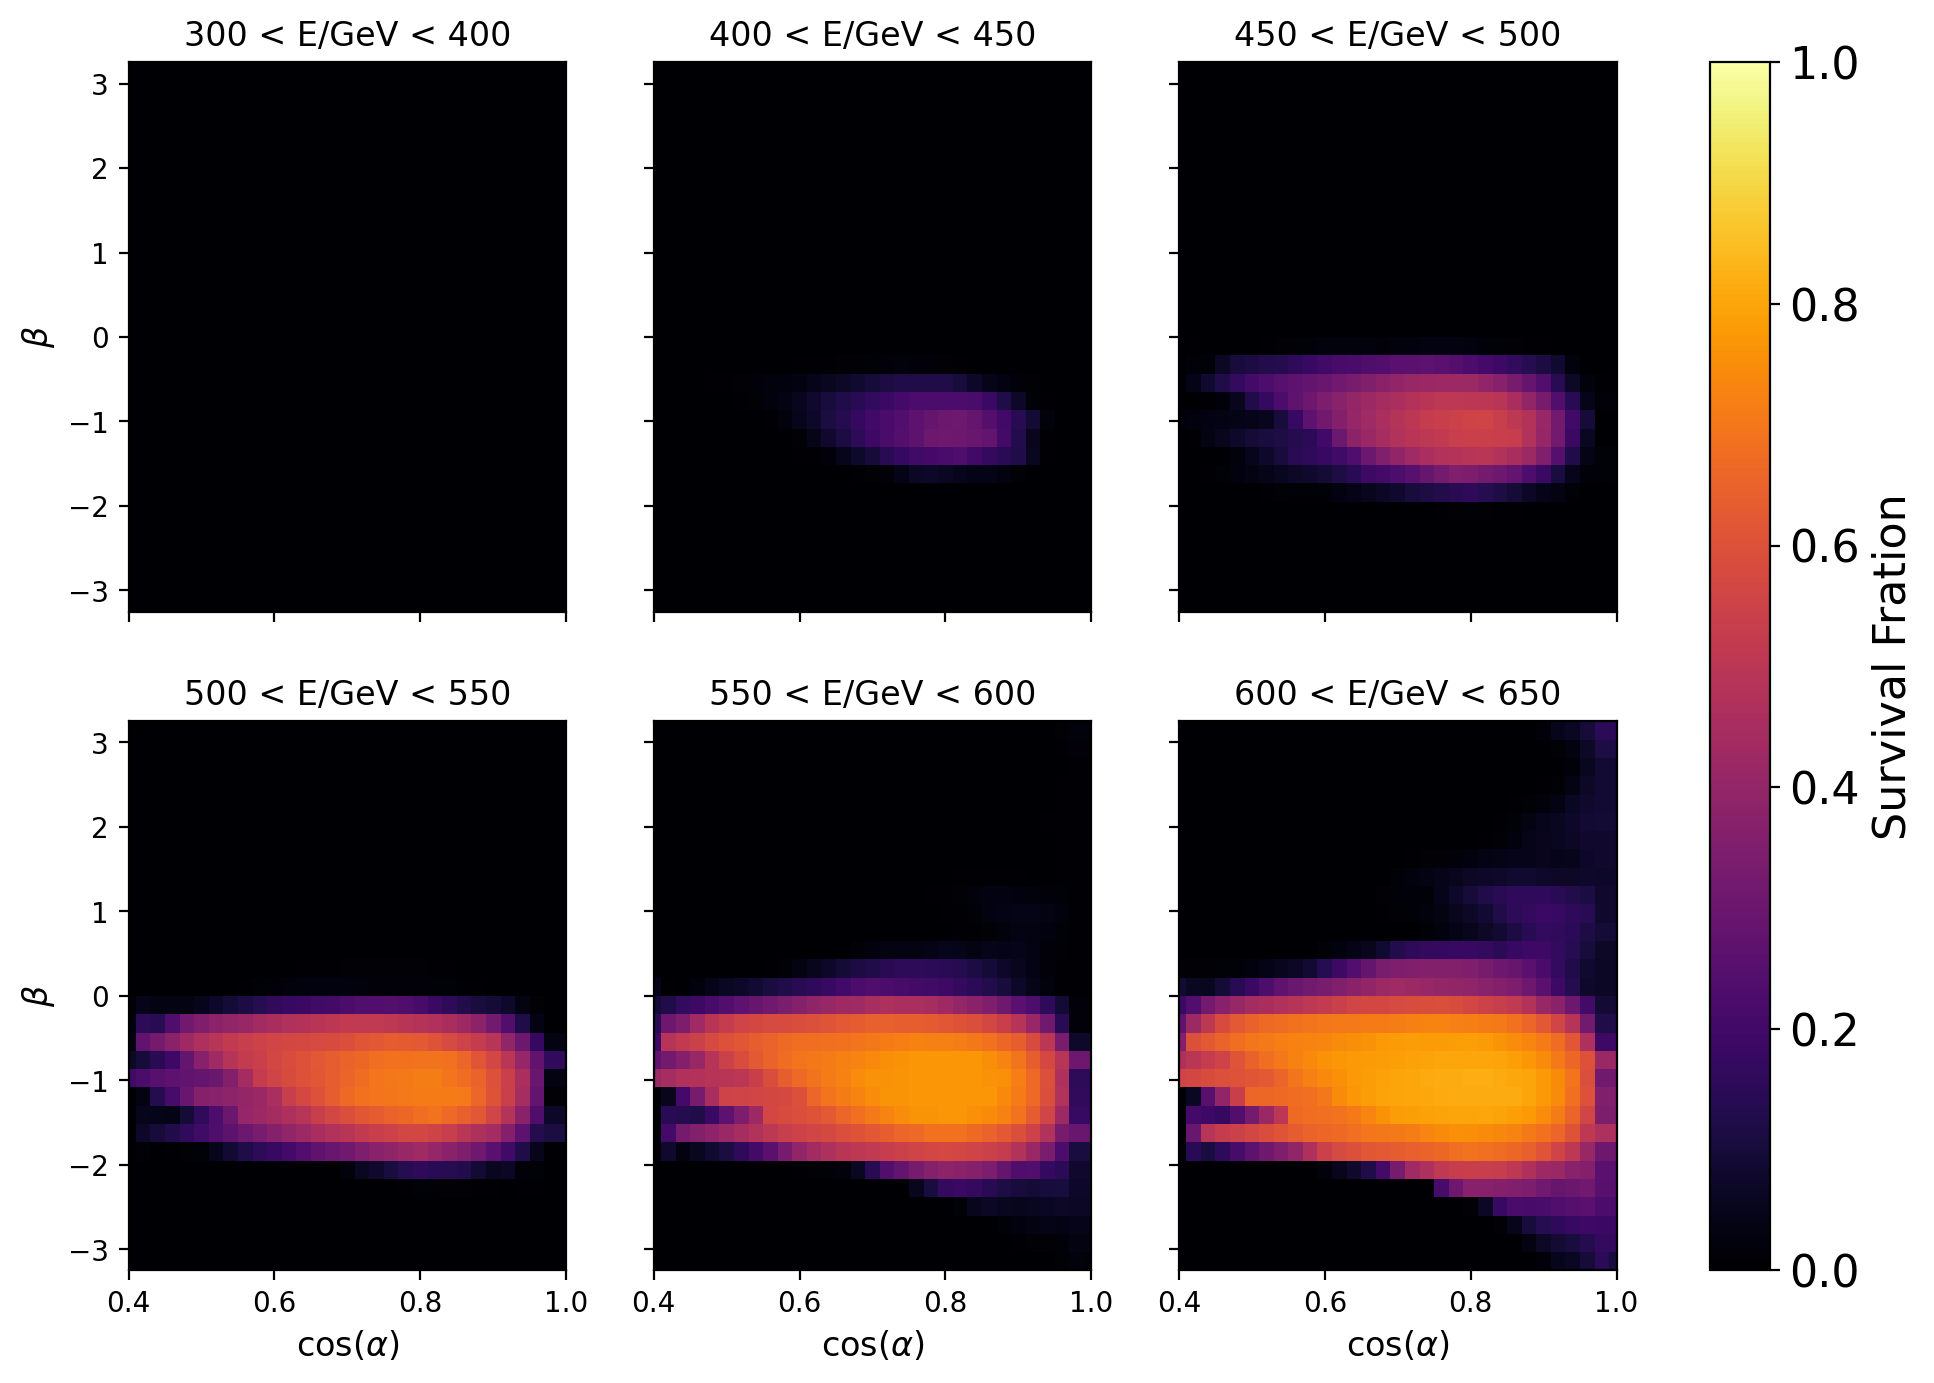

In [62]:
startn=1
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12,8),dpi=200, sharex=True, sharey=True)
for iax in range(0,len(axes.flat)):
    ax=axes.flatten()[iax]
    im=ax.pcolormesh(cosas,bs,np.transpose(survivalfractions[iax+startn]),cmap='inferno',shading='auto',vmin=0,vmax=1)
    ax.set_title(str(EBins[iax+startn])+ " < E/GeV < " + str(EBins[iax+startn+1]))
    ax.set_xlim(0.4,1)
cbar=fig.colorbar(im, ax=axes.ravel().tolist())
cbar.set_label('Survival Fration',fontsize=16)
cbar.ax.tick_params(labelsize=16)

axes[1,0].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,1].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,2].set_xlabel(r"cos($\alpha$)",fontsize=12)

axes[1,0].set_ylabel(r"$\beta$",fontsize=12)
axes[0,0].set_ylabel(r"$\beta$",fontsize=12)

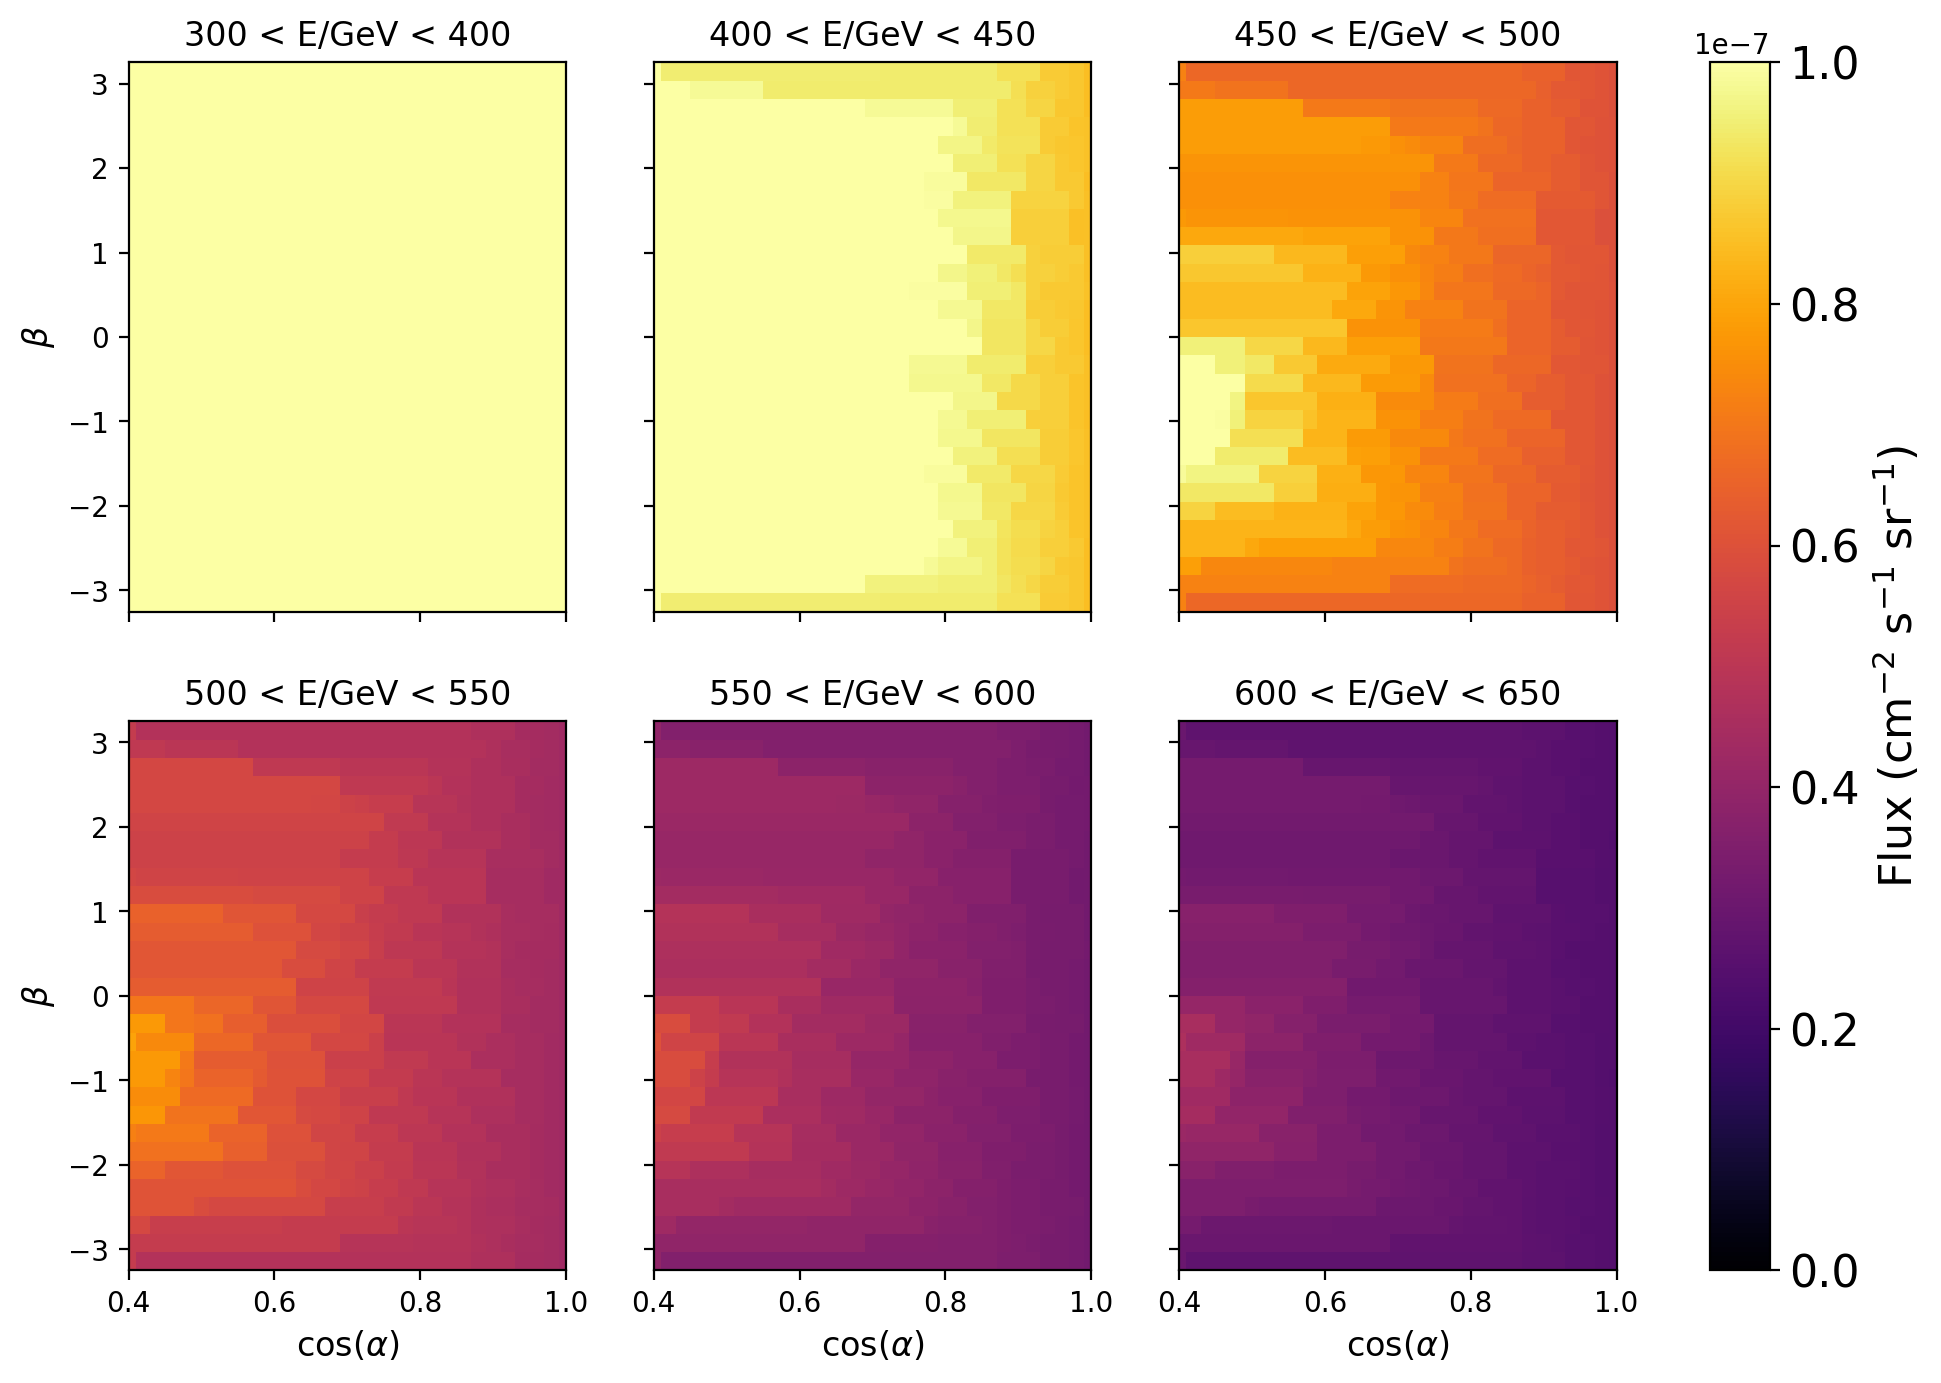

In [63]:
startn=1
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(12,8),dpi=200, sharex=True, sharey=True)
for iax in range(0,len(axes.flat)):
    ax=axes.flatten()[iax]
    im=ax.pcolormesh(cosas,bs,np.transpose(FluxMeshes[iax+startn]),cmap='inferno',shading='auto',vmin=0,vmax=1e-7)
    ax.set_title(str(EBins[iax+startn])+ " < E/GeV < " + str(EBins[iax+startn+1]))
    ax.set_xlim(0.4,1)
cbar=fig.colorbar(im, ax=axes.ravel().tolist(),label='Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)')
cbar.set_label('Flux (cm$^{-2}$ s$^{-1}$ sr$^{-1}$)',fontsize=16)
cbar.ax.tick_params(labelsize=16)

axes[1,0].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,1].set_xlabel(r"cos($\alpha$)",fontsize=12)
axes[1,2].set_xlabel(r"cos($\alpha$)",fontsize=12)

axes[1,0].set_ylabel(r"$\beta$",fontsize=12)
axes[0,0].set_ylabel(r"$\beta$",fontsize=12)

plt.savefig('/Users/rogerslc/Documents/MuFluxPred/MCeqFluxes.png',dpi=250,bbox_inches='tight')
plt.show()

In [ ]:
cosas

In [ ]:
cosa_mesh, b_mesh=np.meshgrid(cosas,bs)

In [64]:
a_s=np.arccos(cosas-0.001)

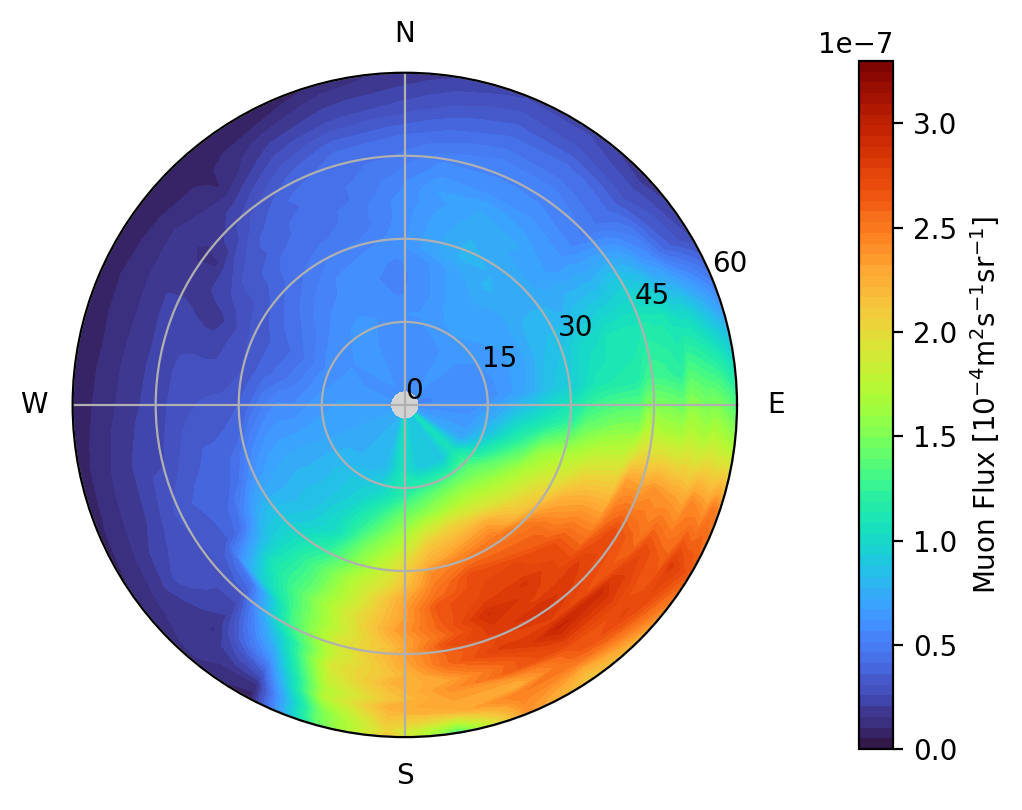

In [65]:

fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),constrained_layout=True,figsize=(5,5),dpi=200)
fig.patch.set_facecolor('white')
levels=np.linspace(0,3.3e-7,65)
im=ax.contourf(bs,np.arccos(cosas-0.001)*180/3.14, totalflux,cmap='turbo',levels=levels)
ax.set_rlim(0,60)
ax.set_rticks([0,15,30,45,60])
#plt.savefig("Radars/"+str(ei).zfill(2)+".png",dpi=200)
cb =plt.colorbar(im, shrink=0.7,ticks=np.arange(0,3.5e-7,5e-8))
#cb = fig.colorbar(im, shrink=0.7)
cb.set_label("Muon Flux [10$^{-4}$m$^{2}$s$^{-1}$sr$^{-1}$]")
ax.set_thetagrids([0,90,180,270],['E','N','W','S'])
ax.set(facecolor = "lightgrey",alpha=0.2)
plt.savefig("/Users/rogerslc/Documents/MuFluxPred/PolarFluxes.png",dpi=250,bbox_inches='tight')
plt.show()

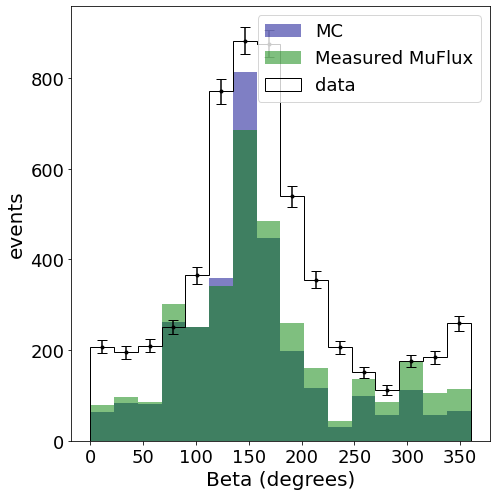

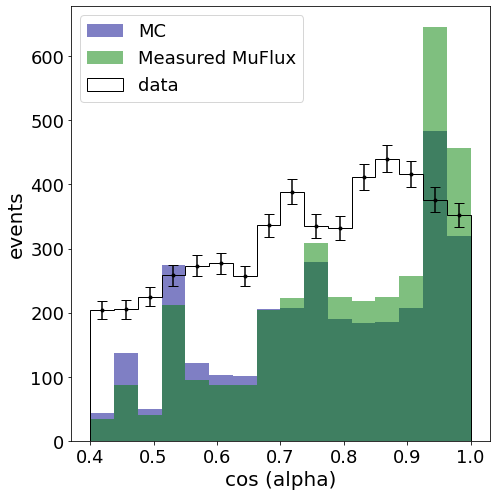

2.5186649023640784 1.9509216940212064 2.1328000143825827 2.321093740109988


In [92]:
numofsteps=17

plt.figure(figsize=(7,7))
Mh=plt.hist(MCmusSpkCut['beta_rot'],weights=MCmusSpkCut['WeightedPts'],bins=np.linspace(0,360,numofsteps),color='DarkBlue',alpha=0.5,label='MC')
Polh=plt.hist(MCmusSpkCut['beta_rot'],weights=MCmusSpkCut['WeightedPts_MeasFlux'],bins=np.linspace(0,360,numofsteps),color='green',alpha=0.5,label='Measured MuFlux')
h=plt.hist(MounsNoSparks['beta_rot'],bins=np.linspace(0,360,numofsteps),color='black',histtype='step',label='data')
plt.errorbar((h[1][1:]+h[1][:-1])/2,h[0],yerr=np.sqrt(h[0]),capsize=5,fmt='.',color='black')
#plt.title("MC")
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
#plt.xlim(0,360)  
plt.ylabel('events',fontsize=20)
plt.xlabel('Beta (degrees)',fontsize=20)
plt.tight_layout()
#plt.legend(fontsize=18,loc="upper center", ncol=3, title="Mass Fraction of $^{3}$He",title_fontsize=18)
plt.legend(fontsize=18,loc="upper right")
#plt.savefig('betahist.png',dpi=250,bbox_inches='tight')
plt.show()

factorbeta=np.mean(h[0]/Mh[0])
factorbetaM=np.mean(h[0]/Polh[0])

plt.figure(figsize=(7,7))
Mh=plt.hist(np.cos(MCmusSpkCut['alpha']),weights=MCmusSpkCut['WeightedPts'],bins=np.linspace(.4,1,numofsteps),color='DarkBlue',alpha=0.5,label='MC')
Polh=plt.hist(np.cos(MCmusSpkCut['alpha']),weights=MCmusSpkCut['WeightedPts_MeasFlux'],bins=np.linspace(.4,1,numofsteps),color='green',alpha=0.5,label='Measured MuFlux')
h=plt.hist(np.cos(MounsNoSparks['alpha']),bins=np.linspace(.4,1,numofsteps),histtype='step',color='black',label='data')
plt.errorbar((h[1][1:]+h[1][:-1])/2,h[0],yerr=np.sqrt(h[0]),capsize=5,fmt='.',color='black')
#plt.title("MC")
plt.yticks(fontsize=18)  
plt.xticks(fontsize=18) 
#plt.xlim(0,360)  
plt.ylabel('events',fontsize=20)
plt.xlabel('cos (alpha)',fontsize=20)
plt.tight_layout()
plt.legend(fontsize=18,loc="upper left")
#plt.savefig('alphahist.png',dpi=250,bbox_inches='tight')
plt.show()

factoralpha=np.mean(h[0]/Mh[0])
factoralphaM=np.mean(h[0]/Polh[0])
print(factorbeta,factorbetaM,factoralpha,factoralphaM)